In [ ]:
# Importing required library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the housing data
df= pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Analysis

In [ ]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.shape


(1460, 81)

In [ ]:
#find no of non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No_Alley_Access')
df['Fence'] = df['Fence'].fillna('No_Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['Electrical'] = df['Electrical'].fillna("Other")


In [ ]:
basement_cols=['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond']
for col in basement_cols:
    df[col] =df[col].fillna('No_Basement')
garbage_cols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garbage_cols:
    df[col] = df[col].fillna('No_Garage')

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)


In [ ]:
df.drop('Id', axis=1, inplace=True)


In [ ]:
df.drop("LotFrontage",axis = 1, inplace=True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

UniVariant and Bi Variant Analysis

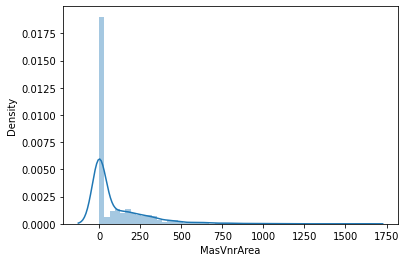

In [ ]:
sns.distplot(df['MasVnrArea'])
plt.show()

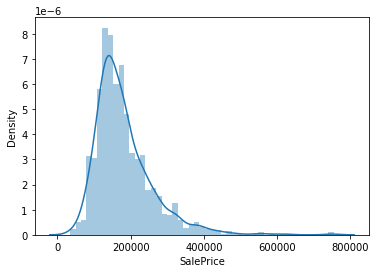

In [ ]:
sns.distplot(df['SalePrice'])


Text(0.5, 1.0, 'Basement Condition')

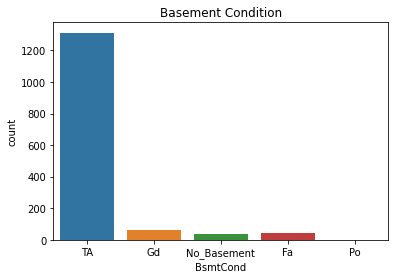

In [ ]:
sns.countplot(x='BsmtCond', data=df)
plt.title('Basement Condition')

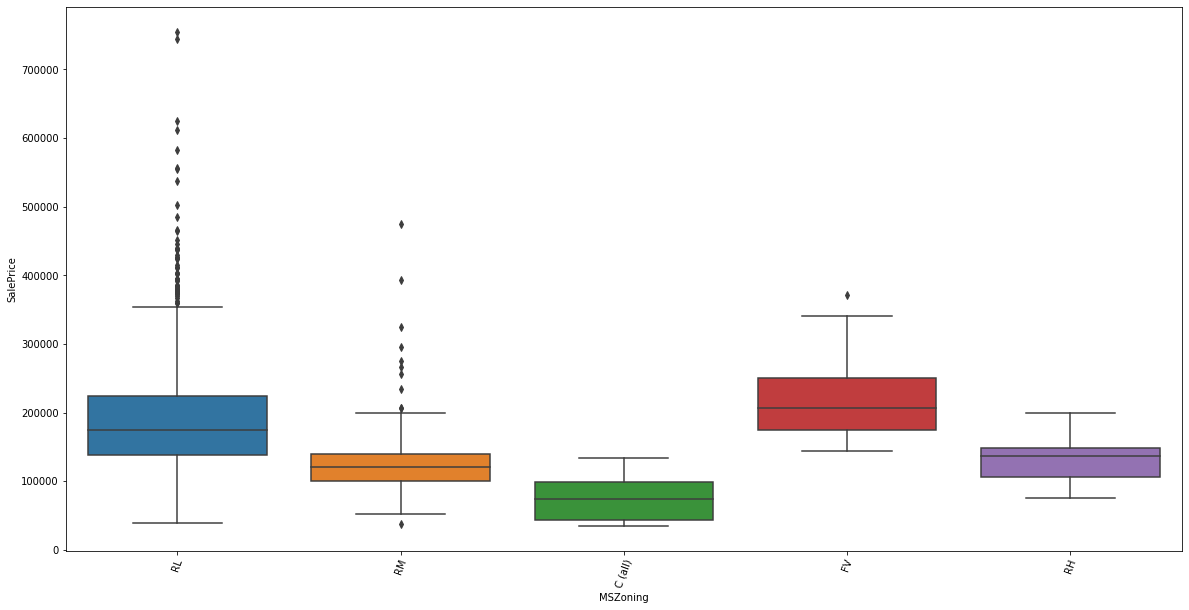

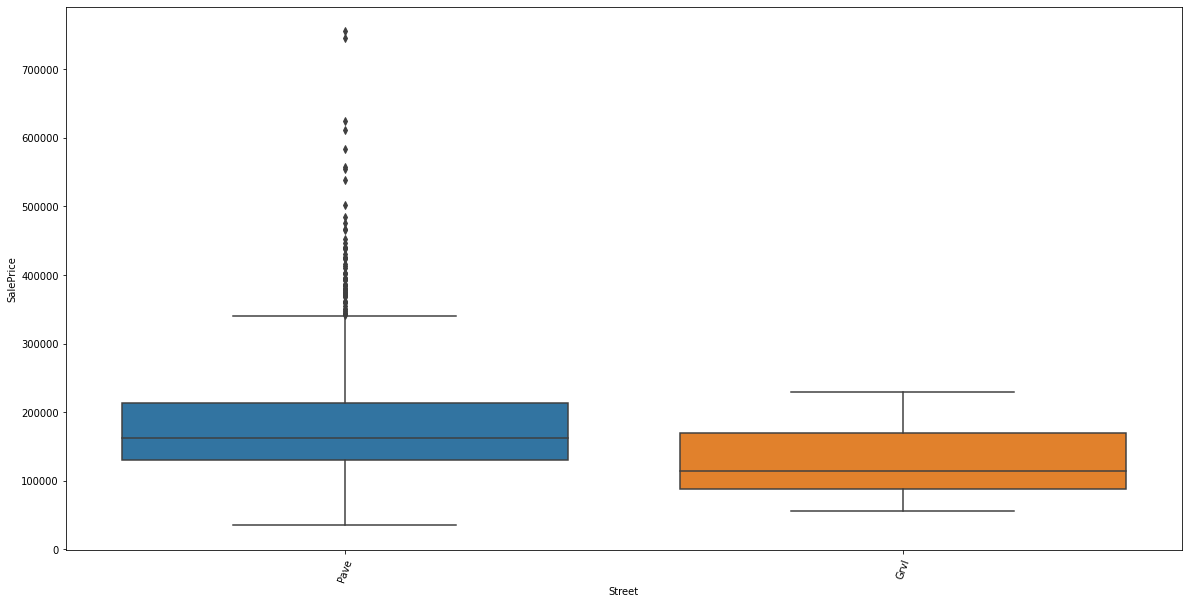

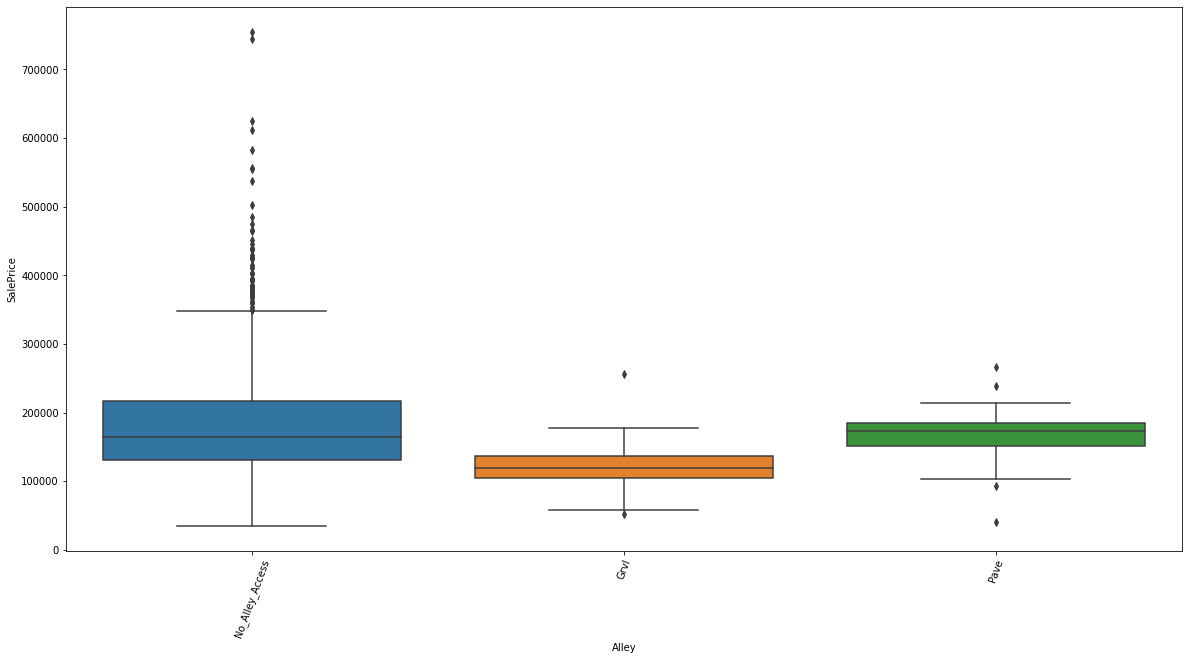

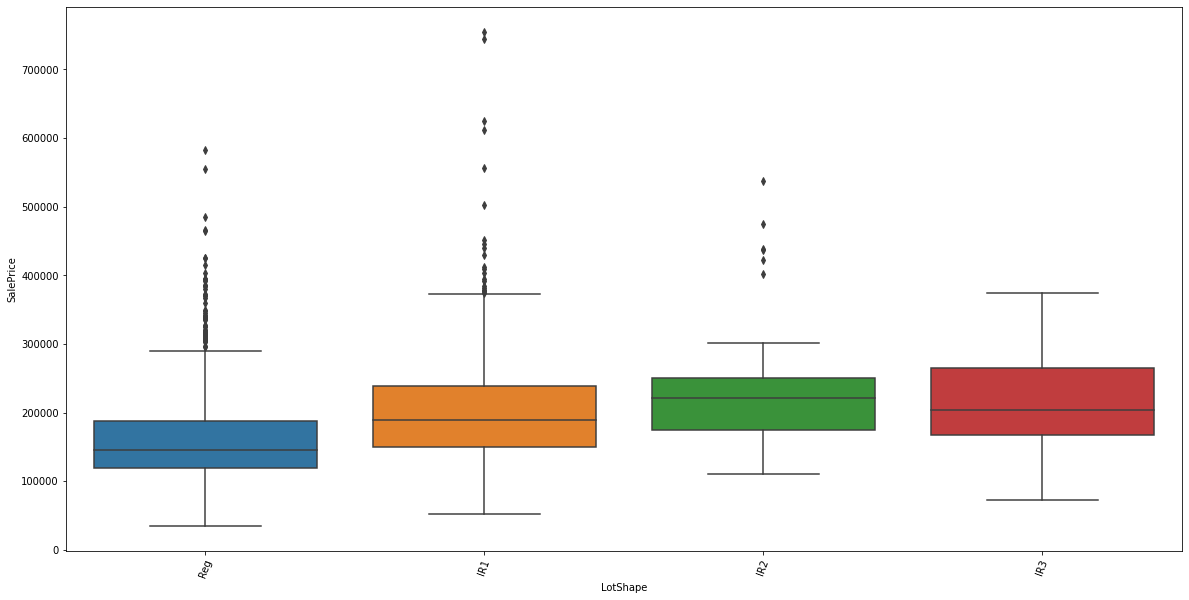

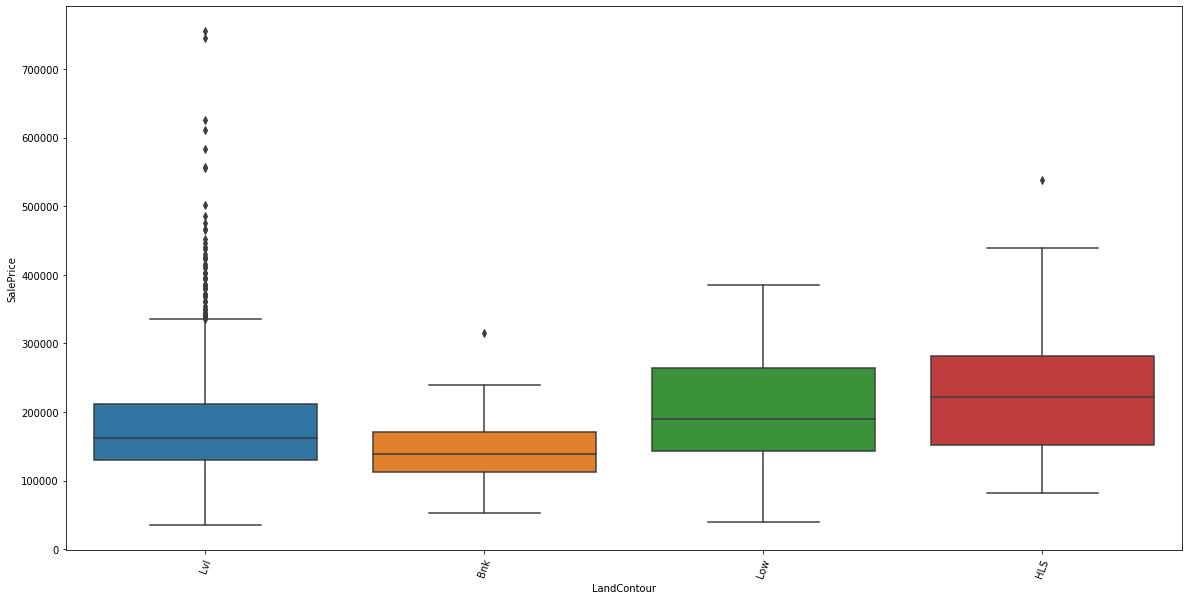

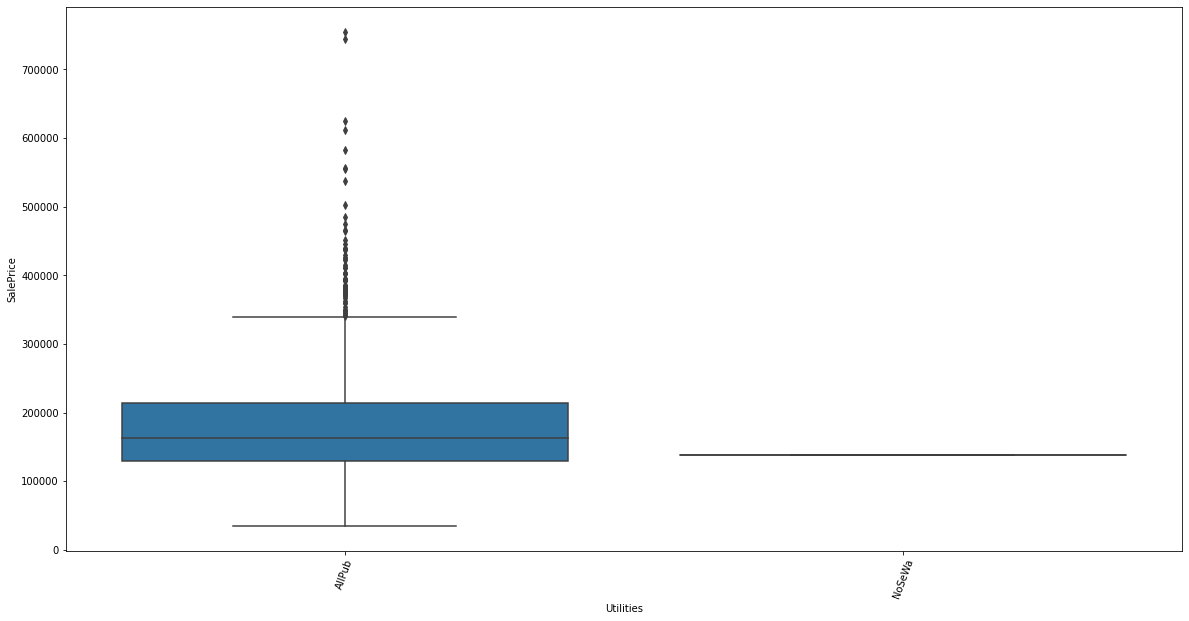

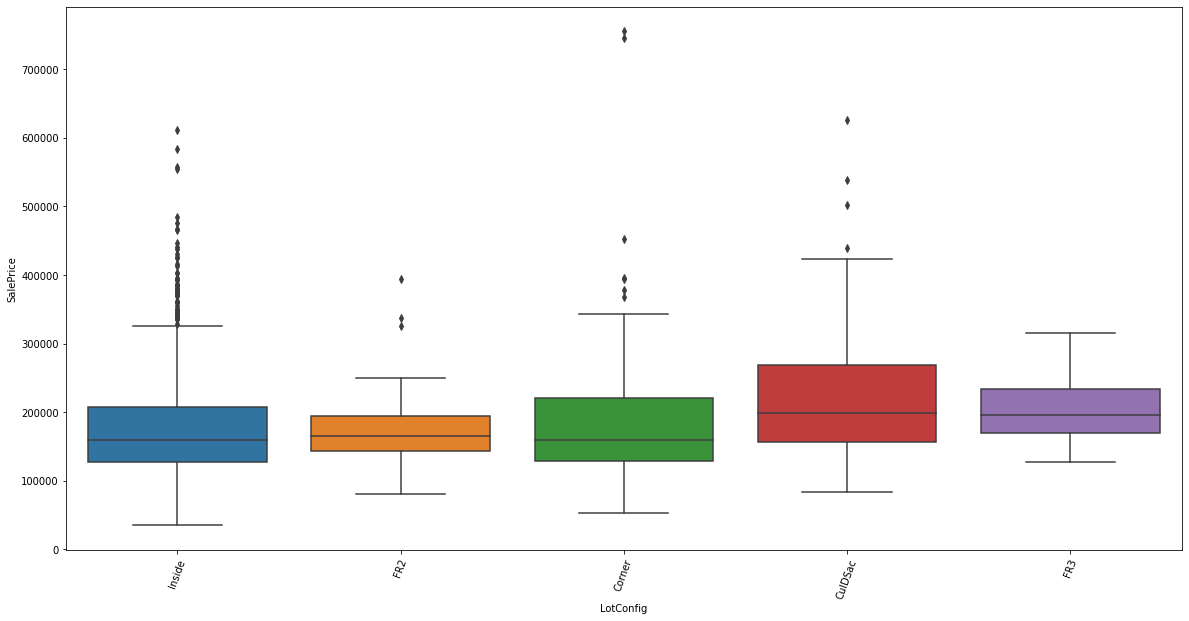

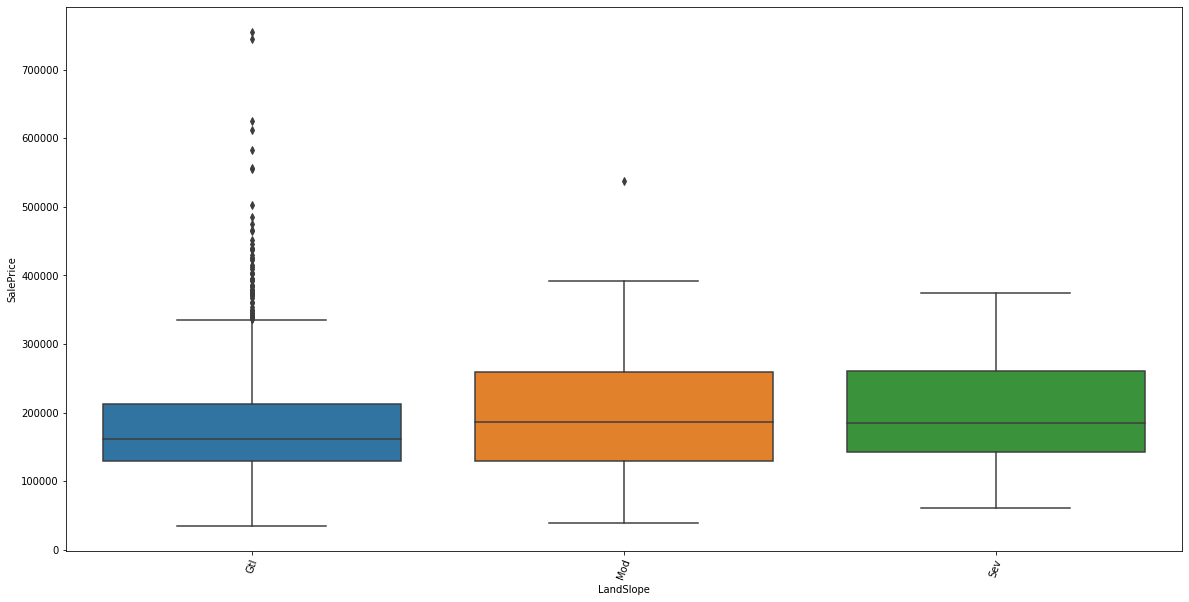

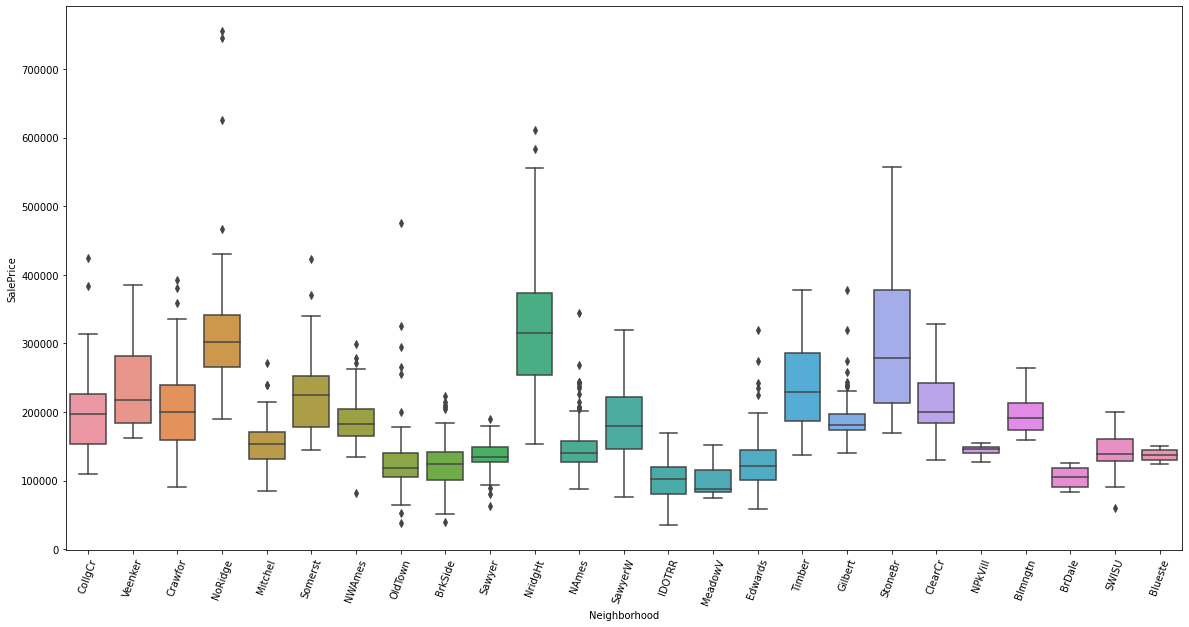

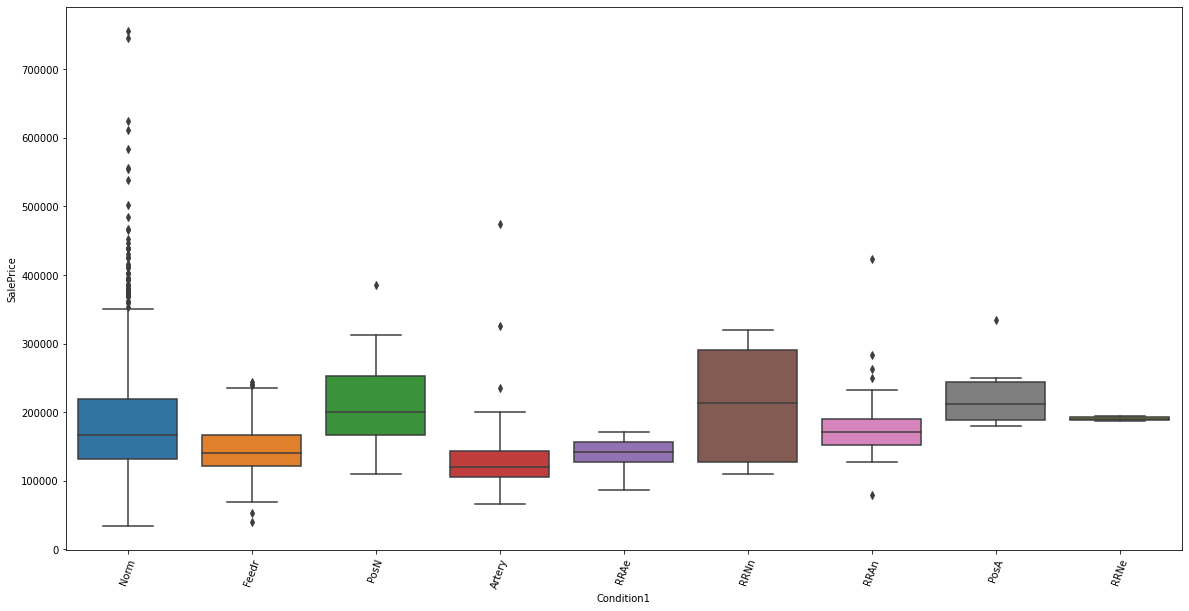

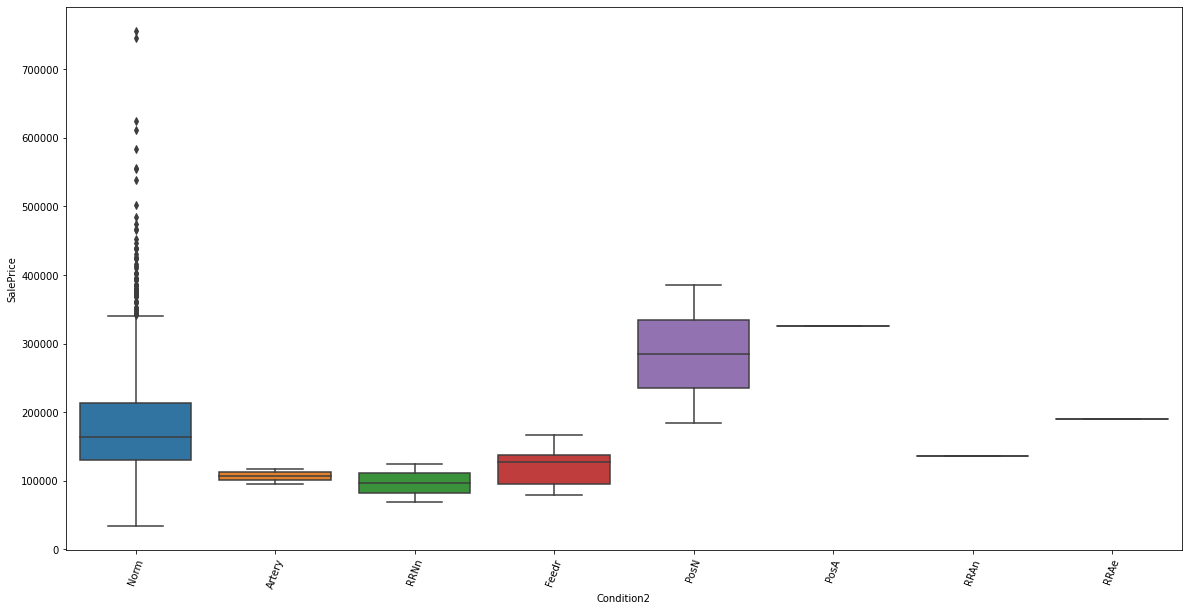

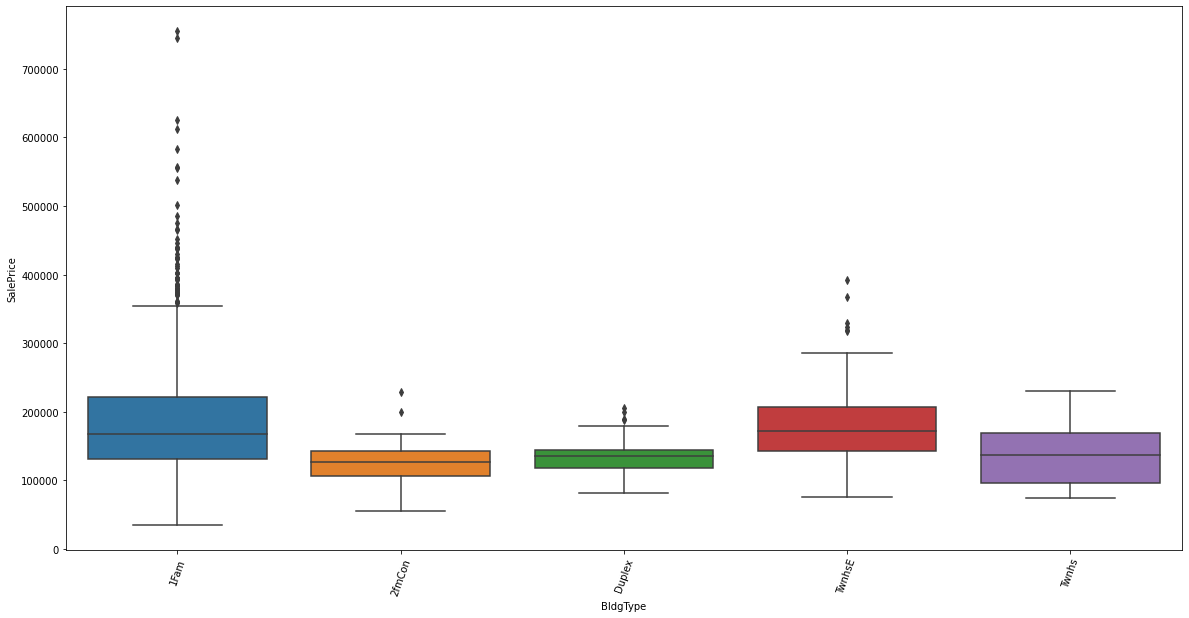

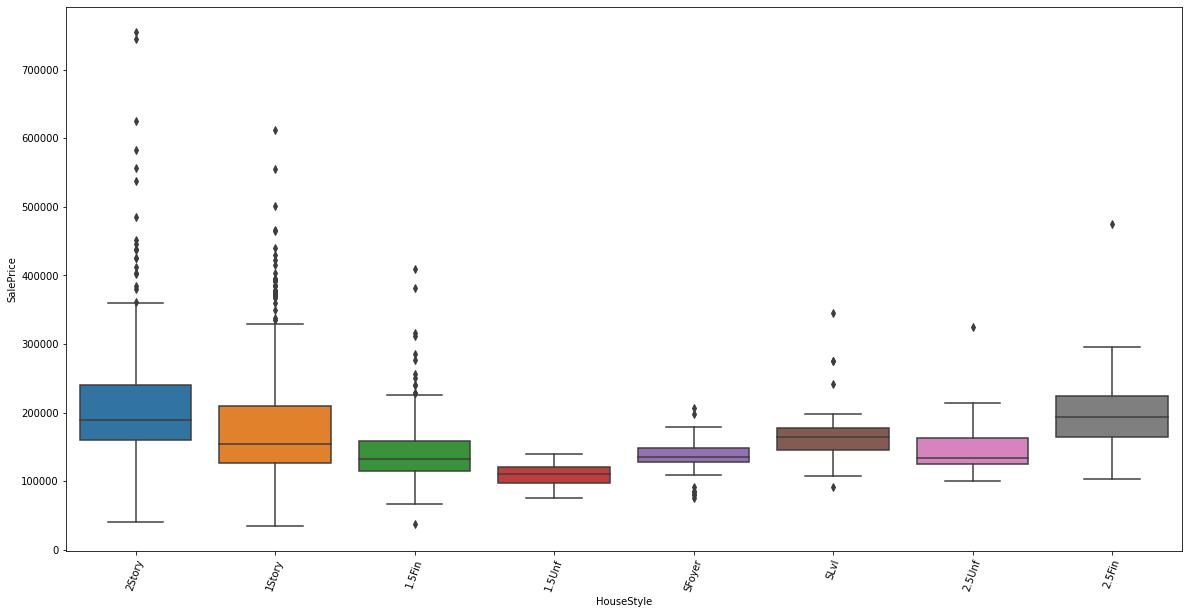

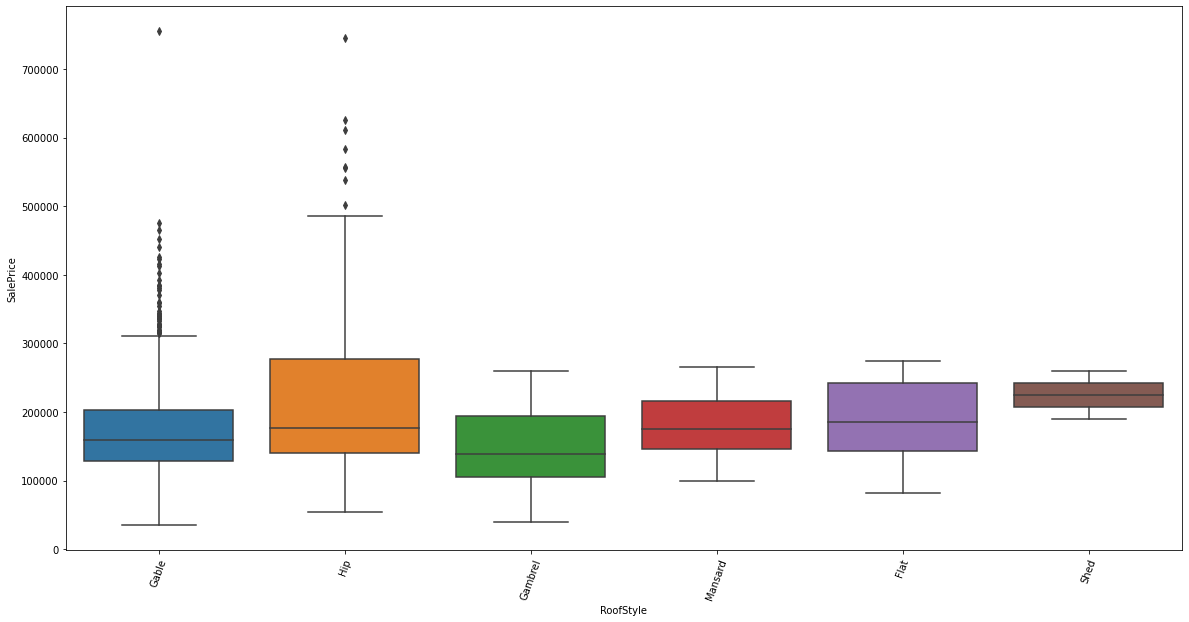

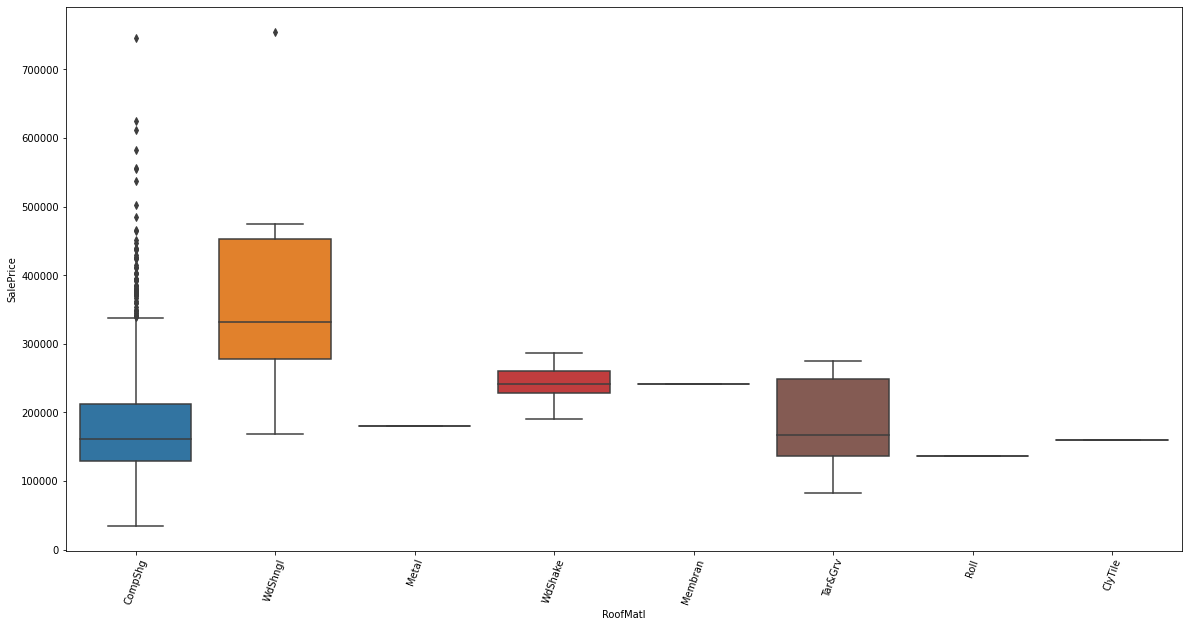

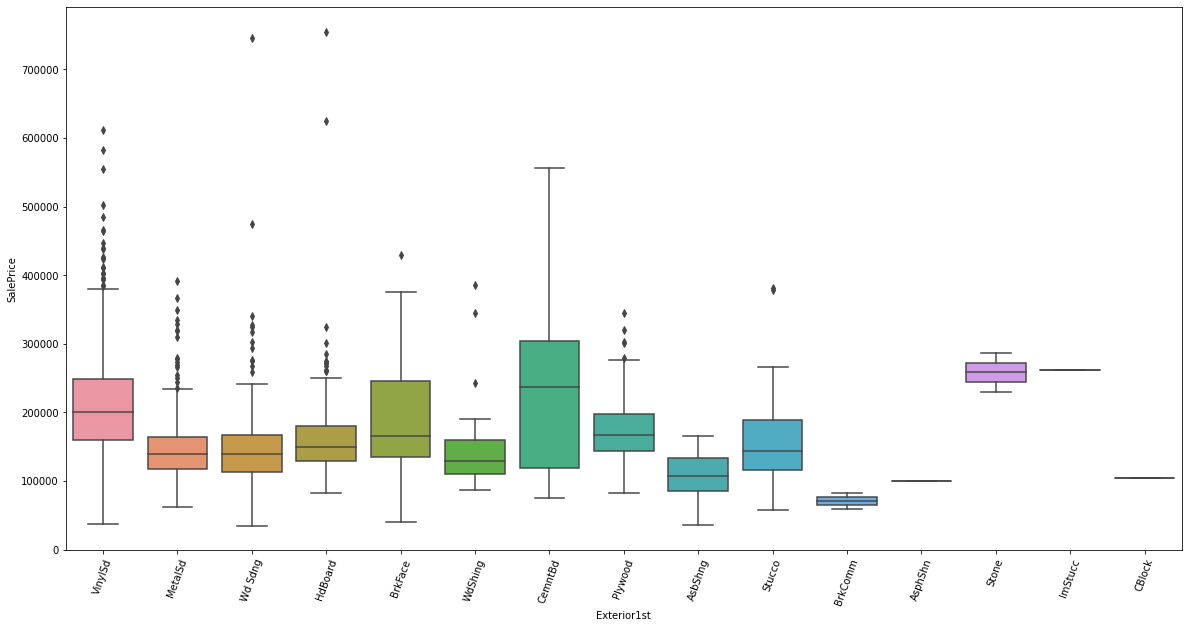

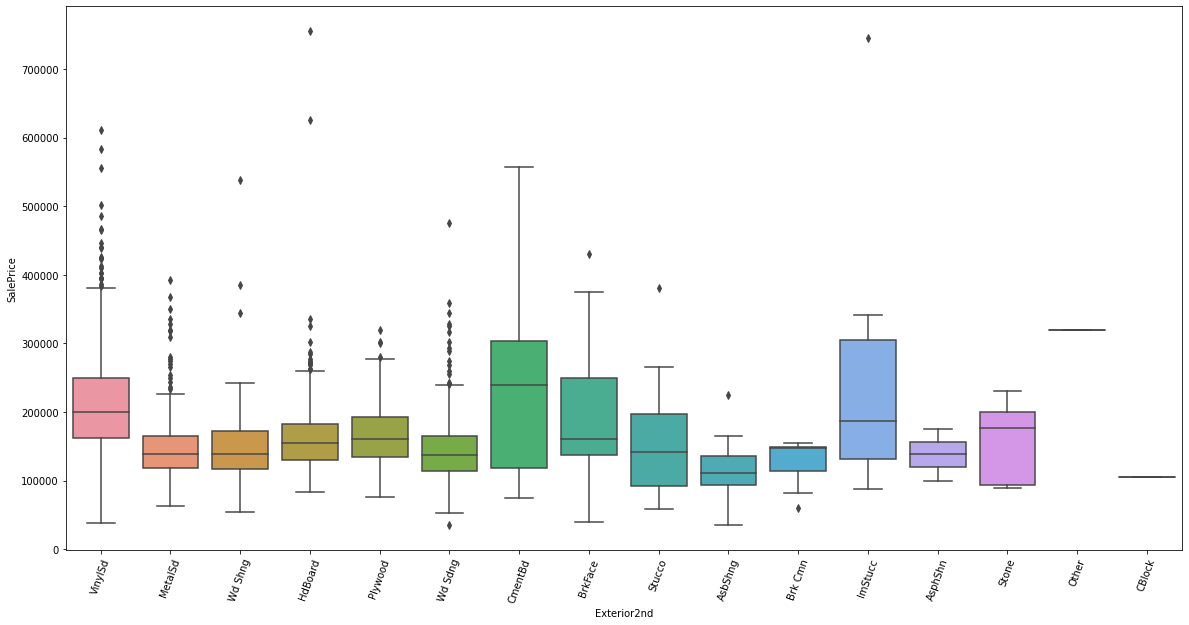

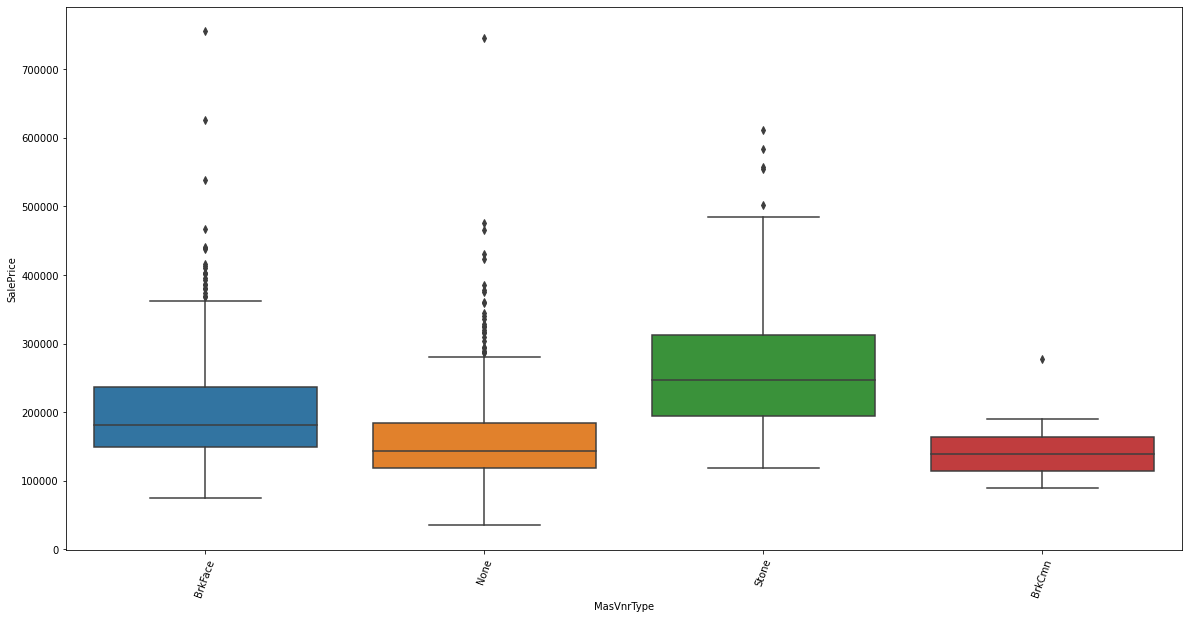

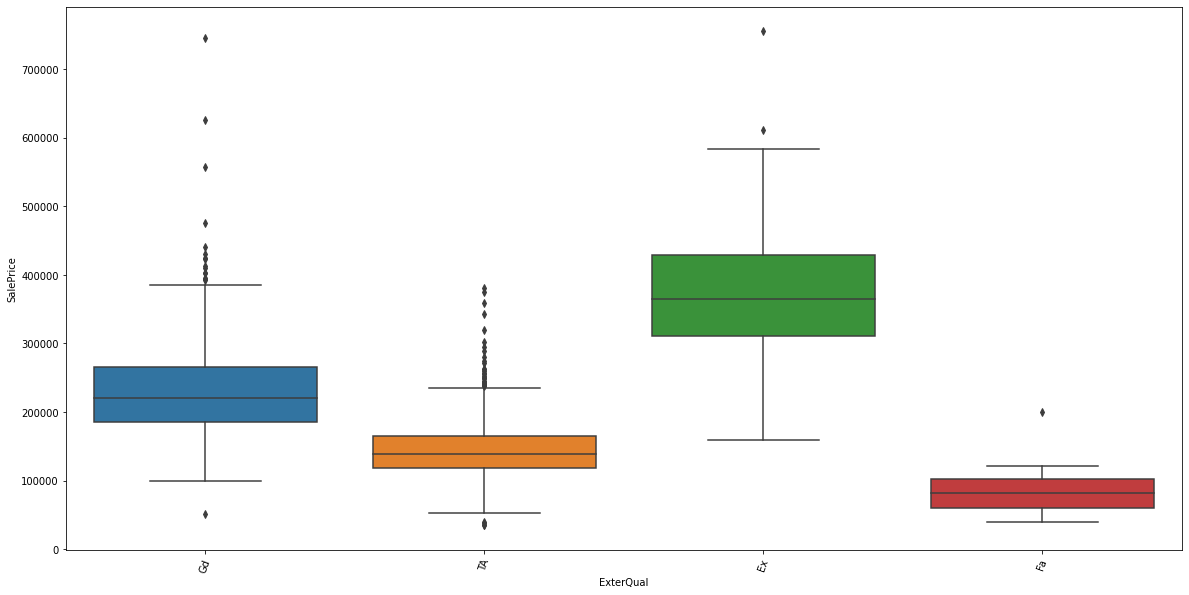

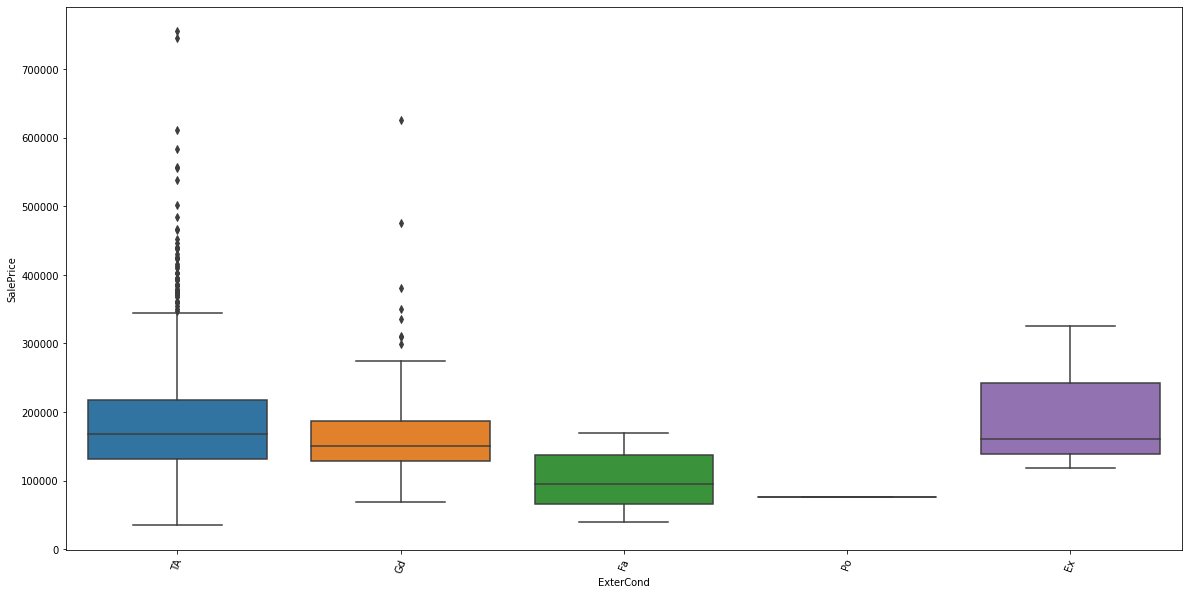

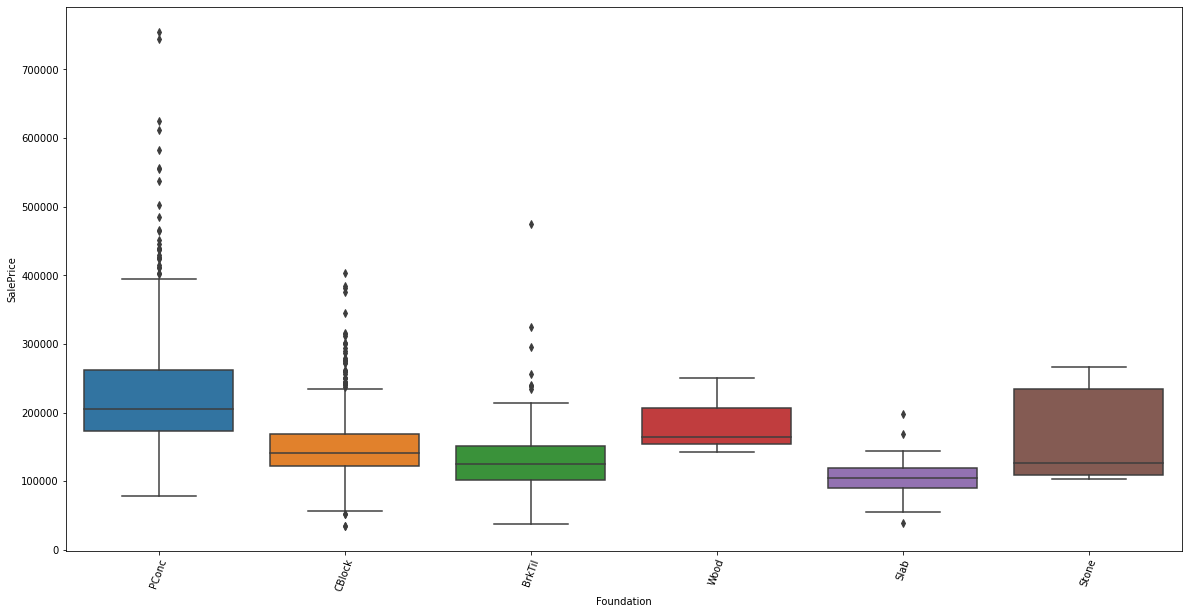

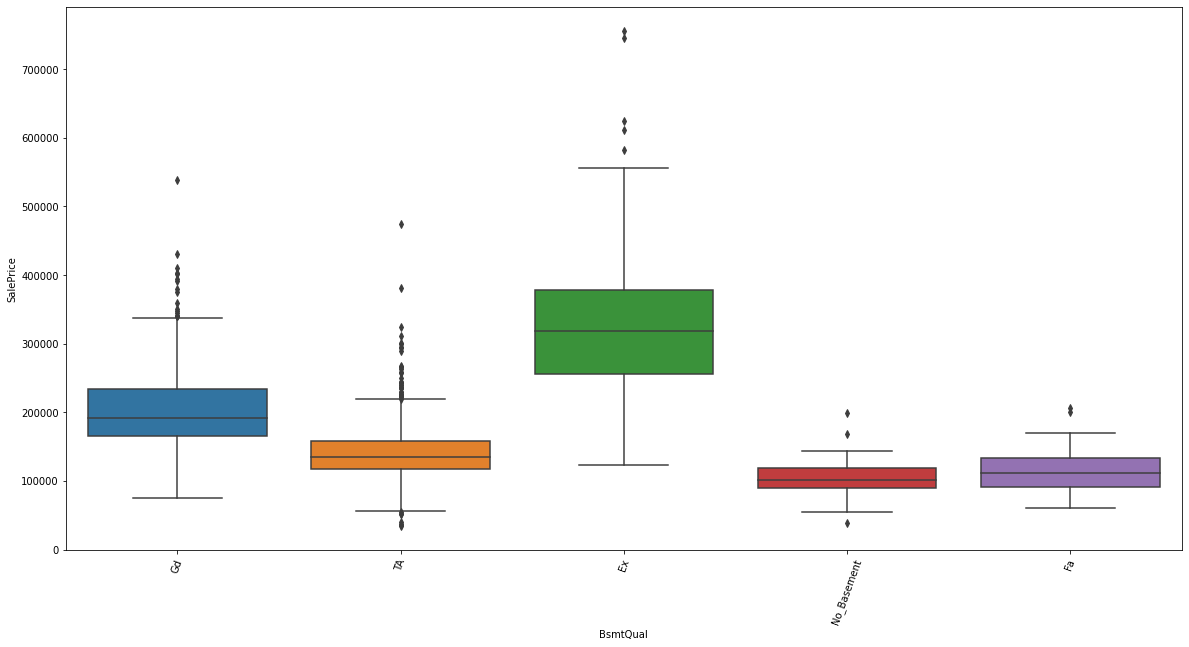

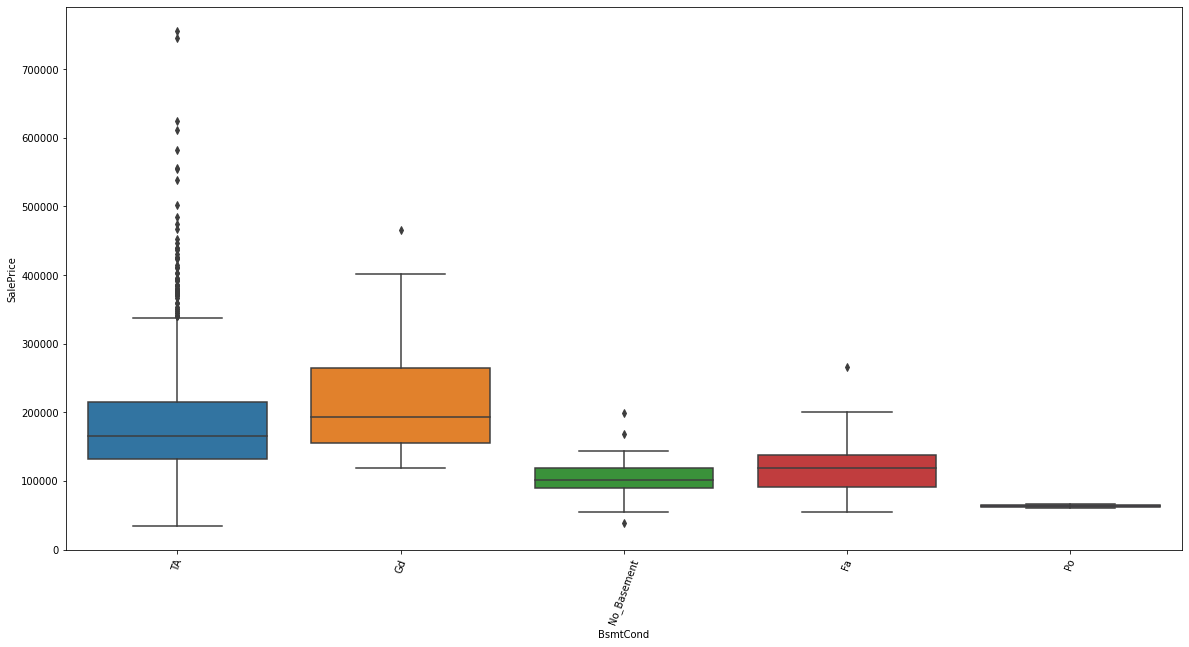

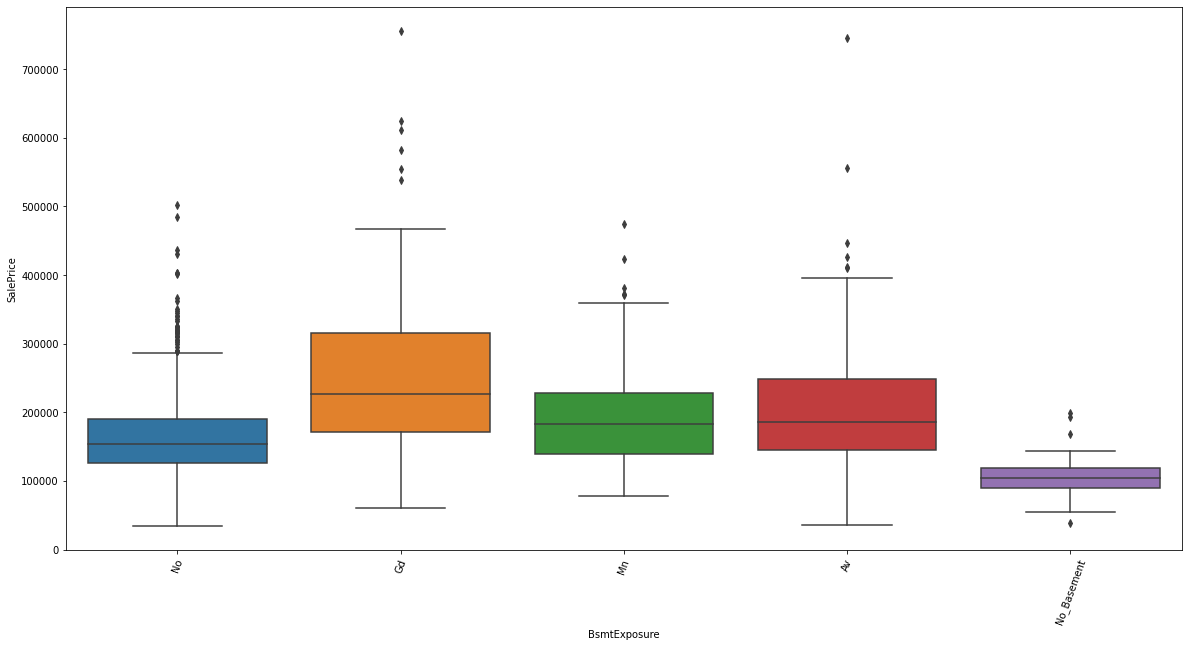

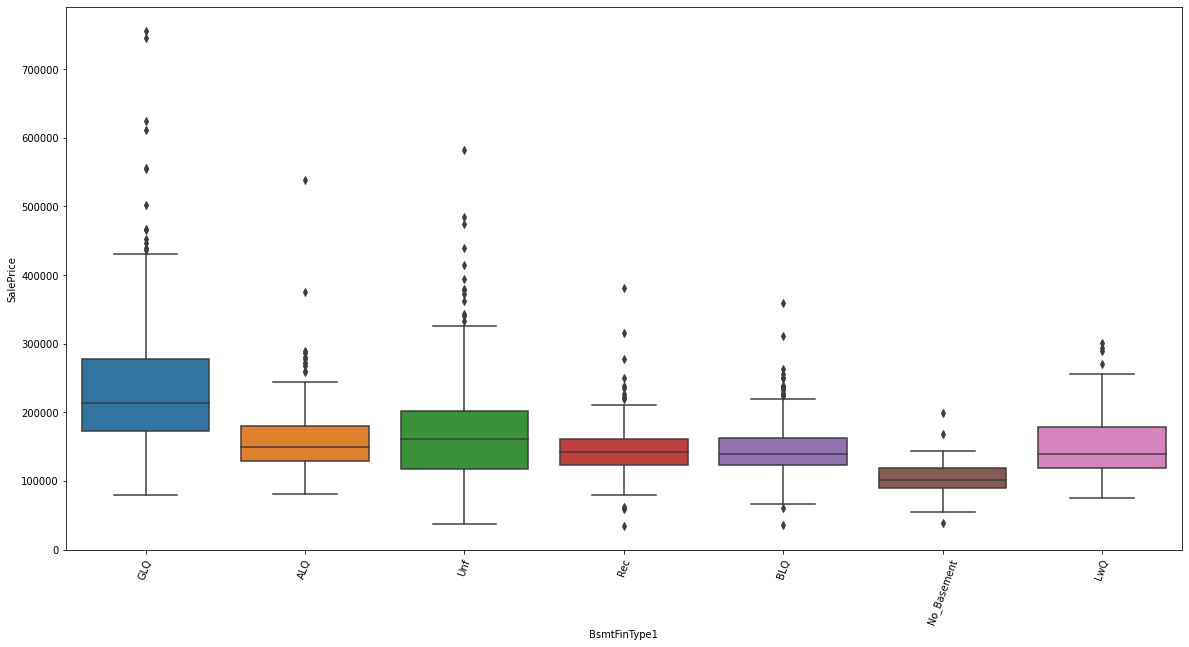

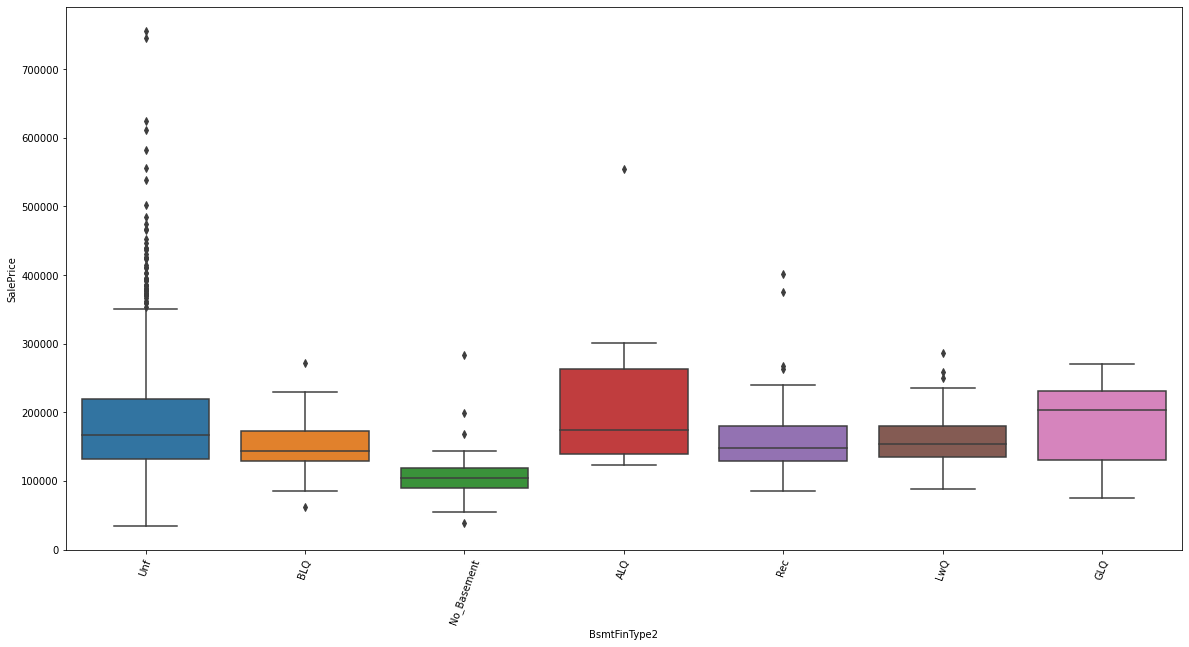

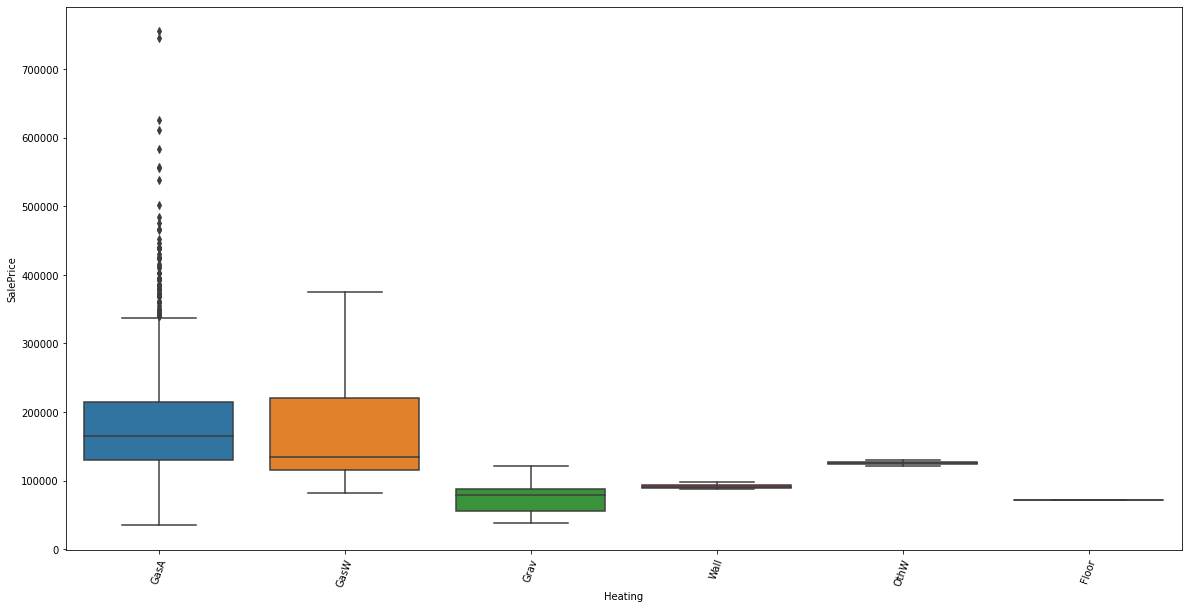

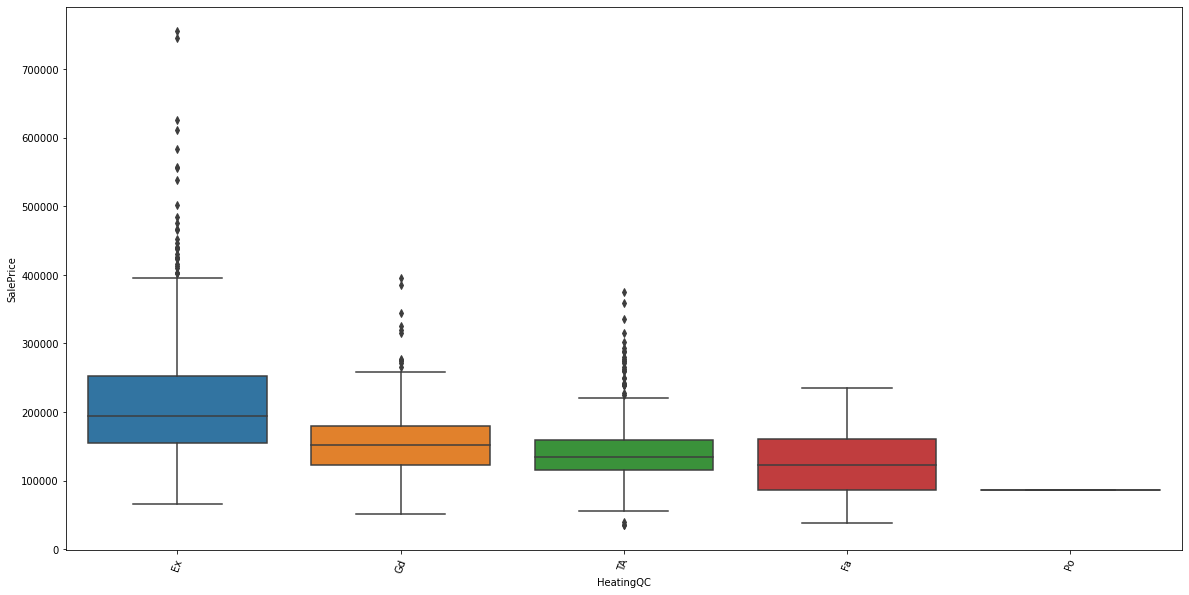

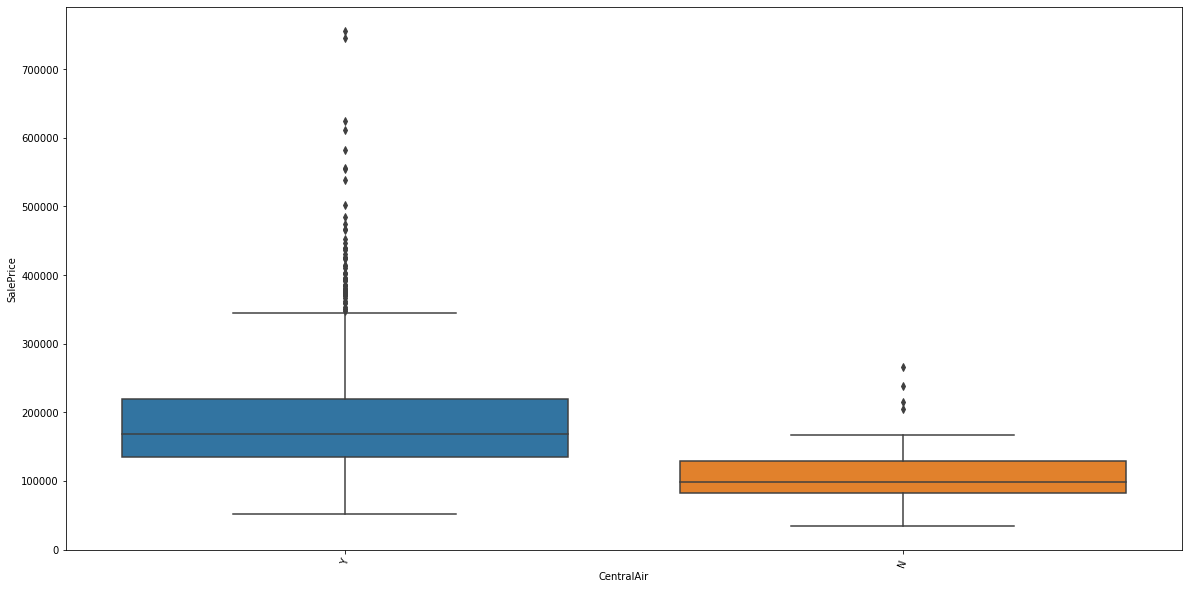

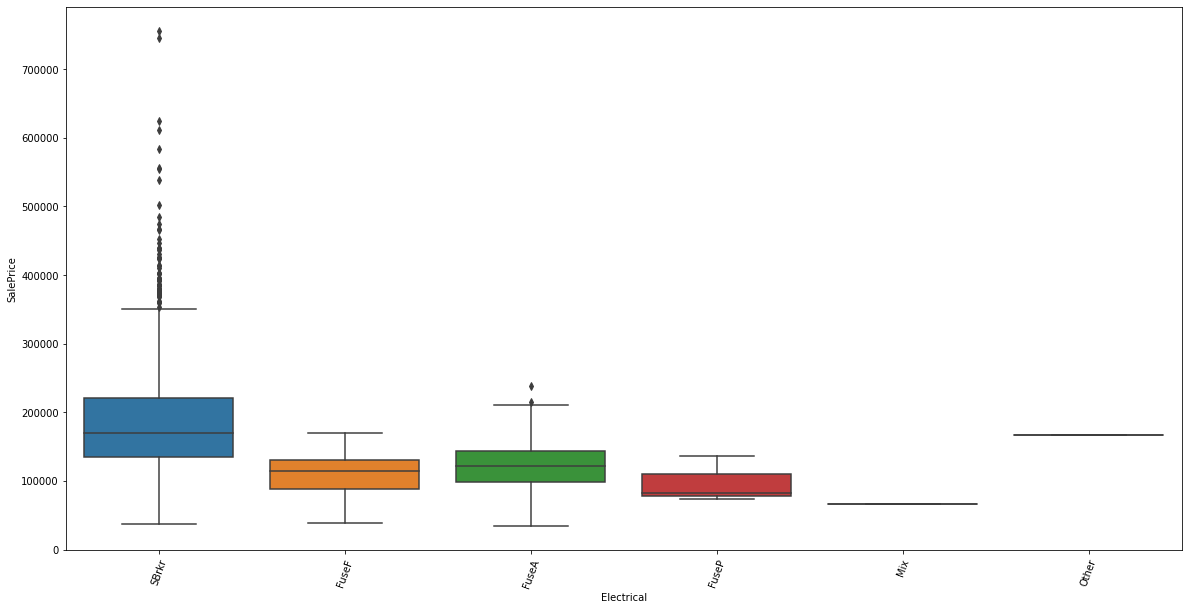

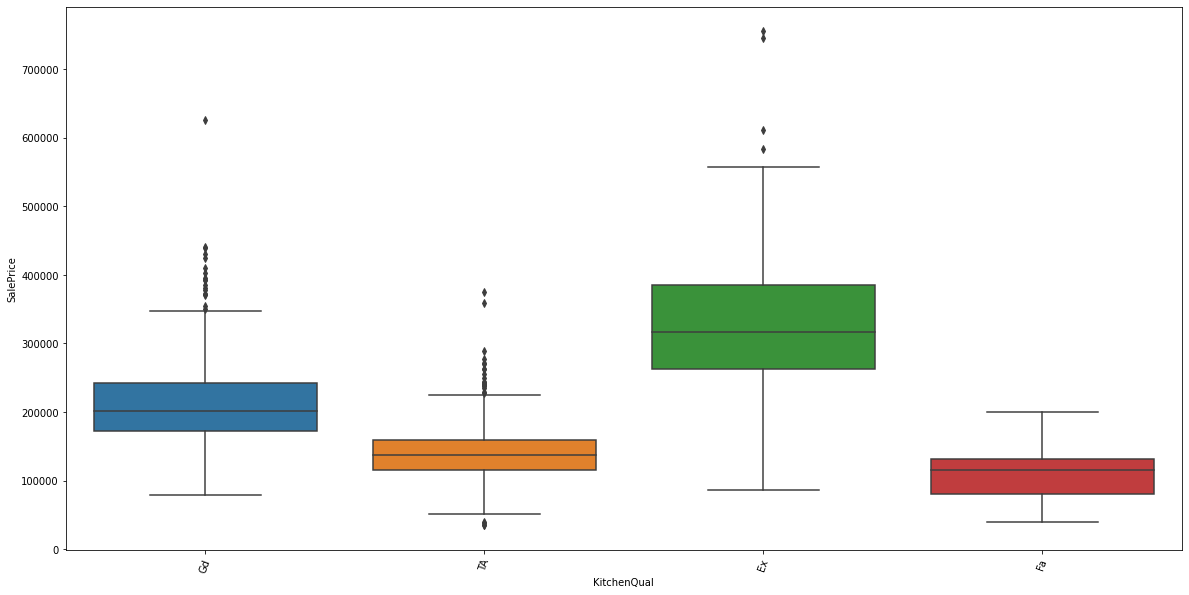

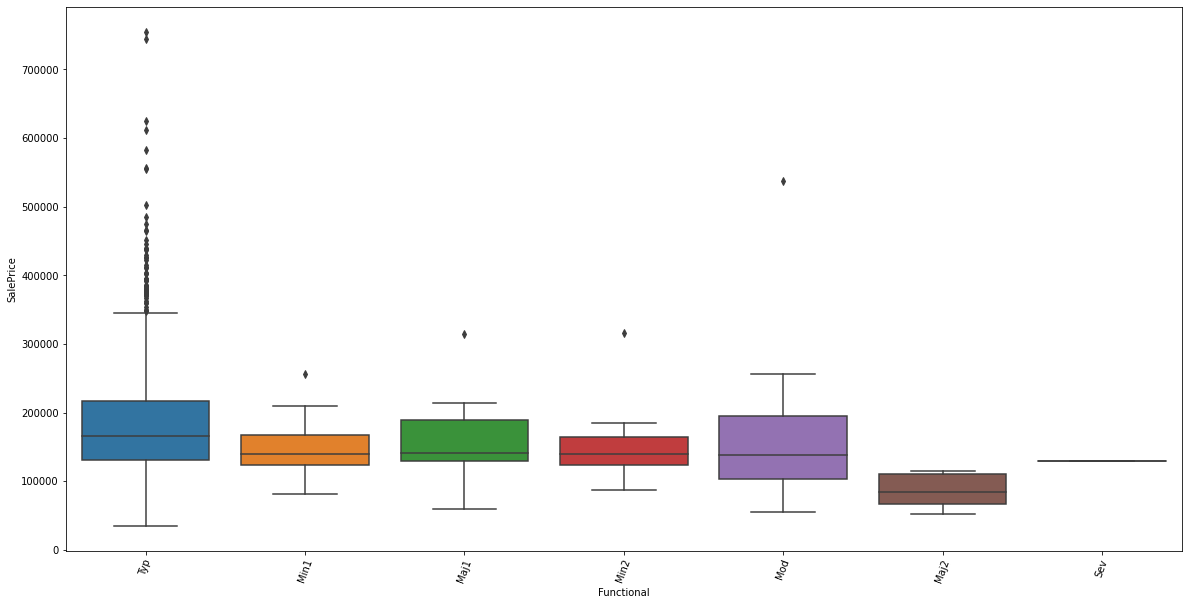

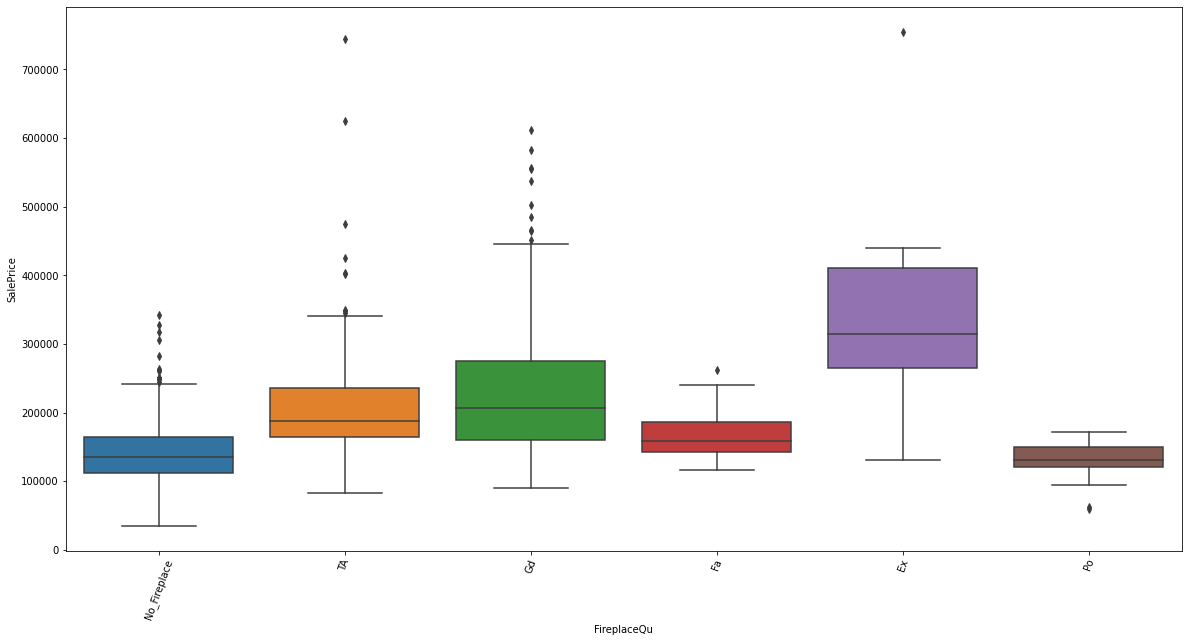

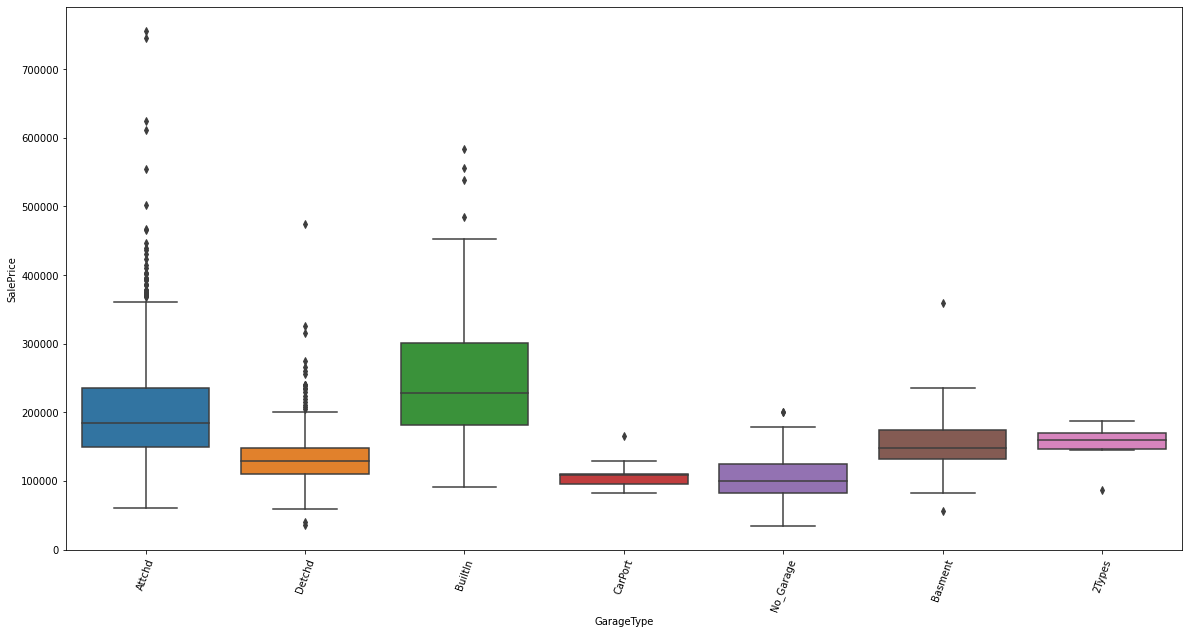

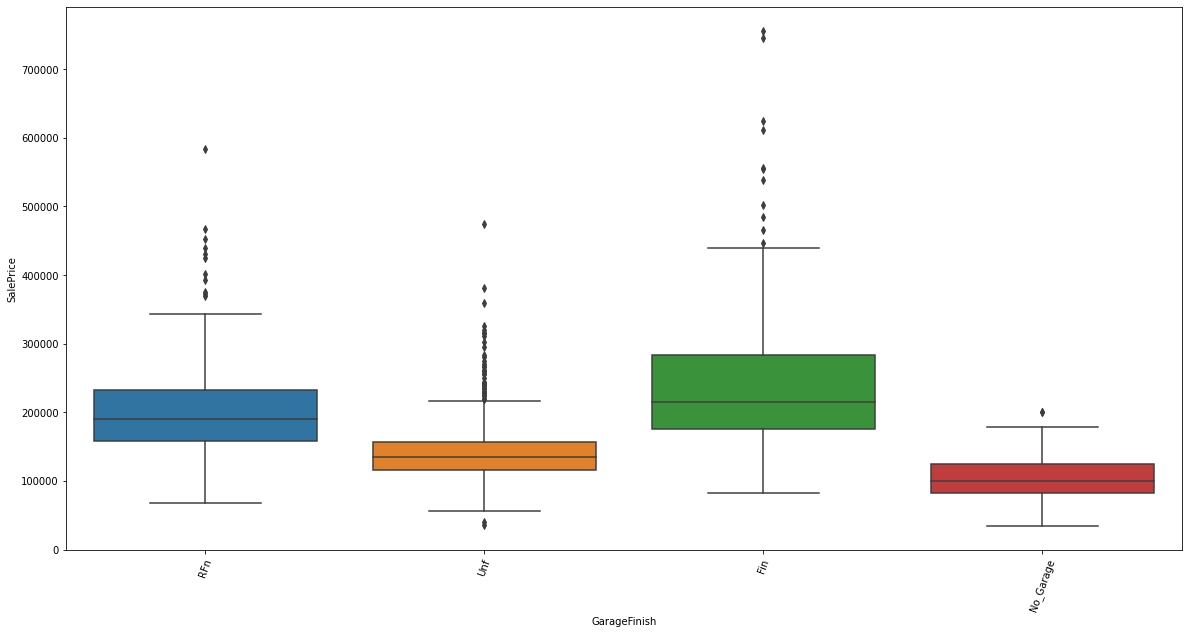

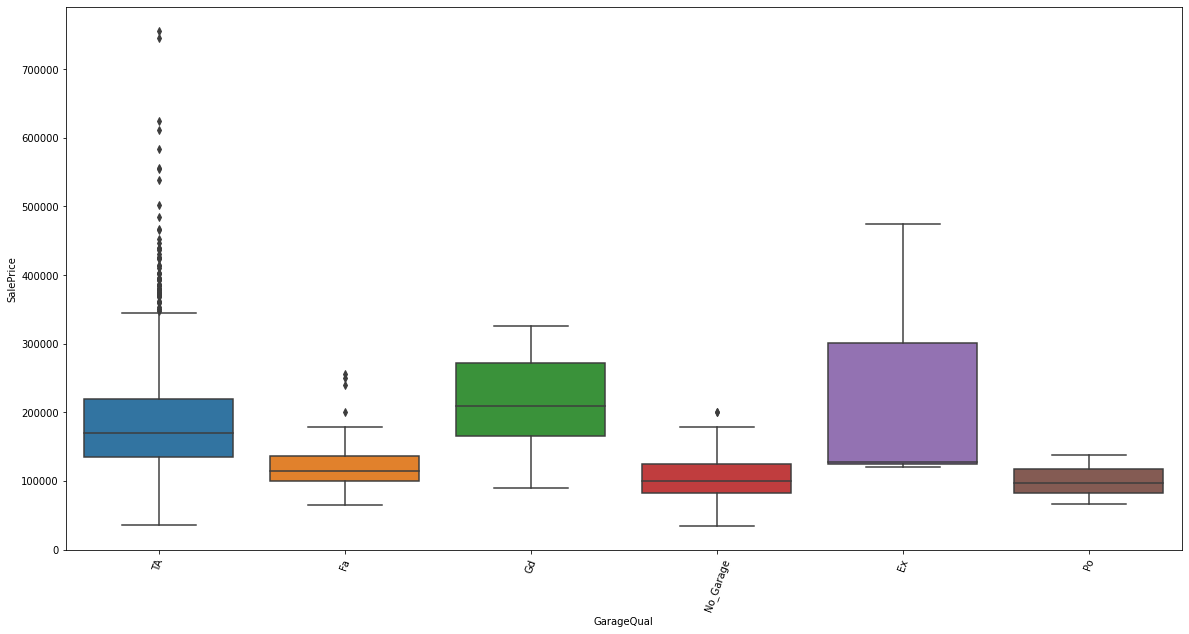

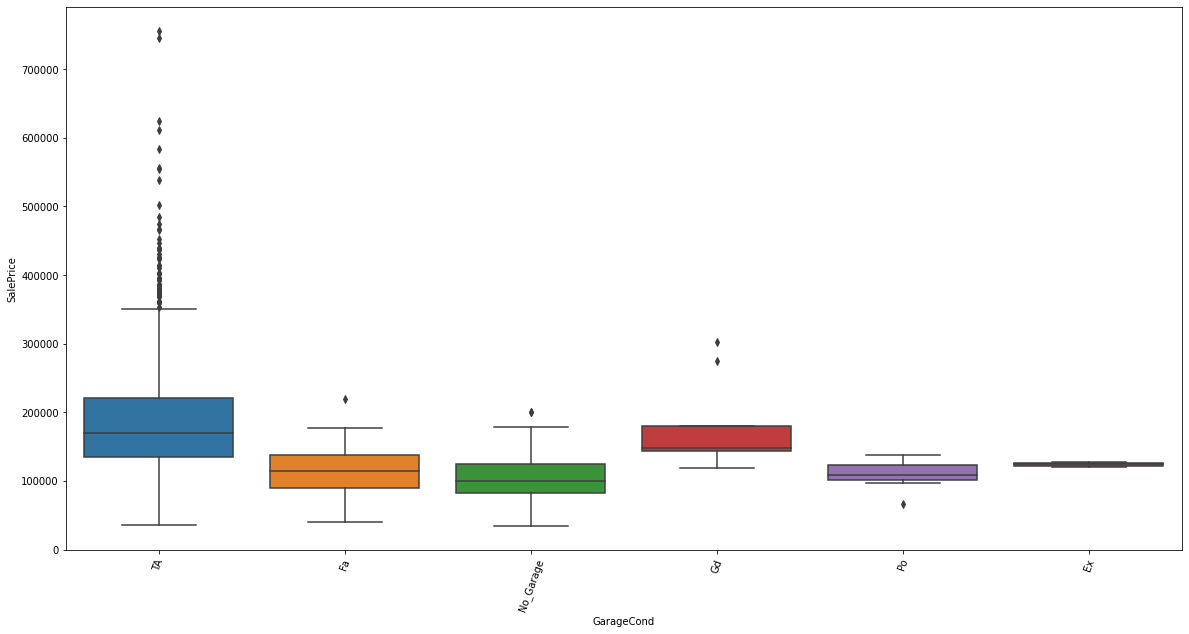

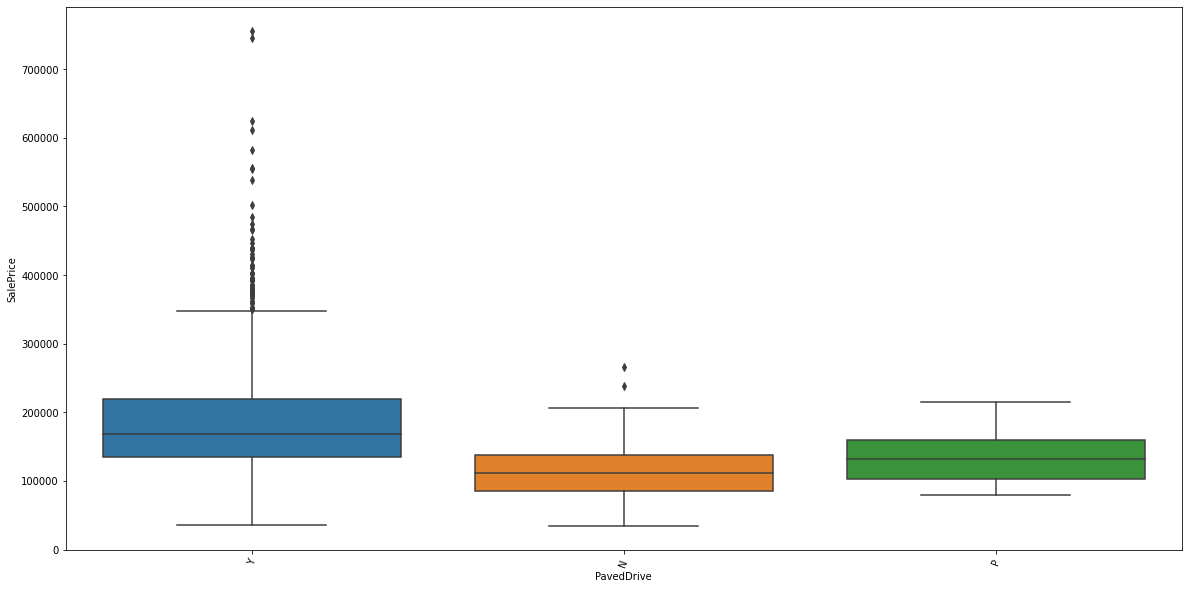

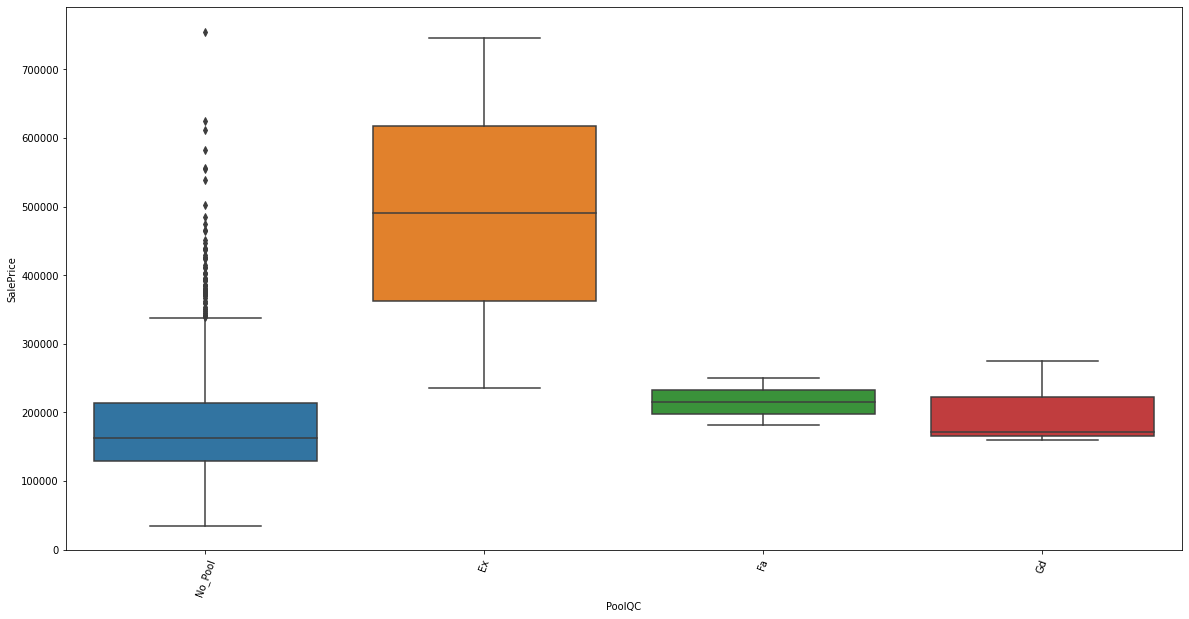

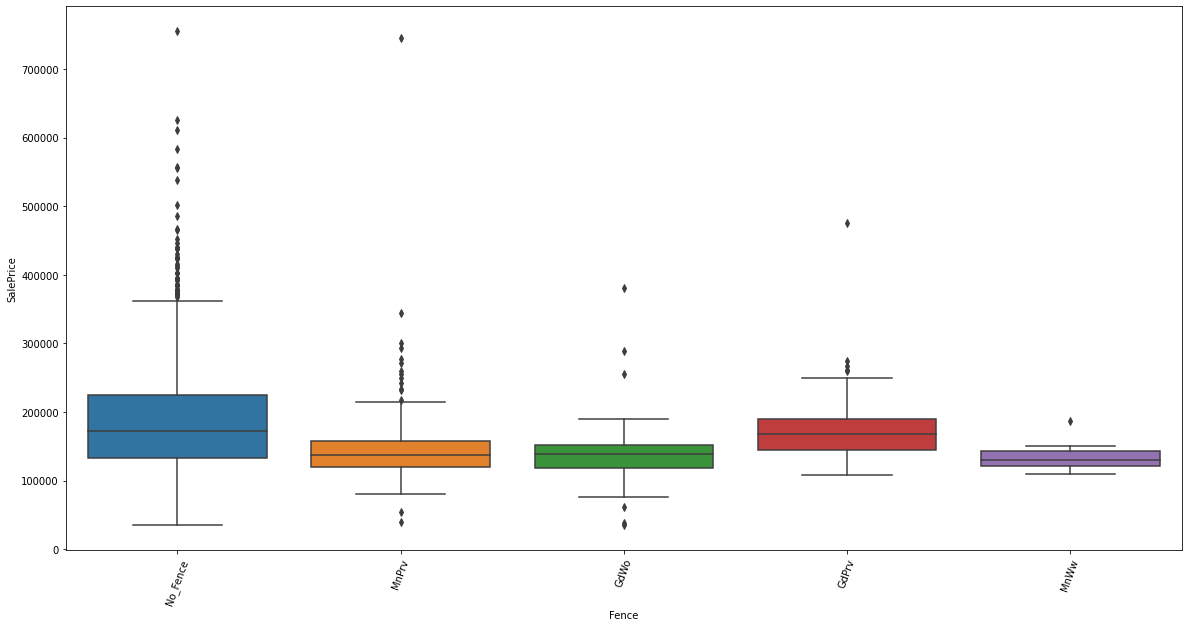

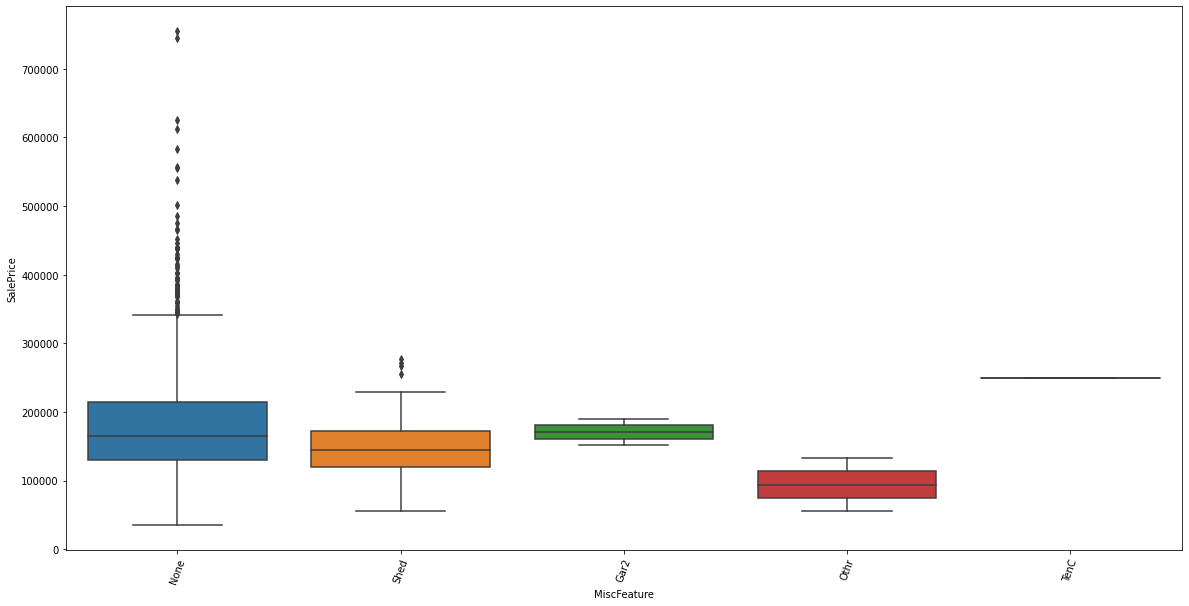

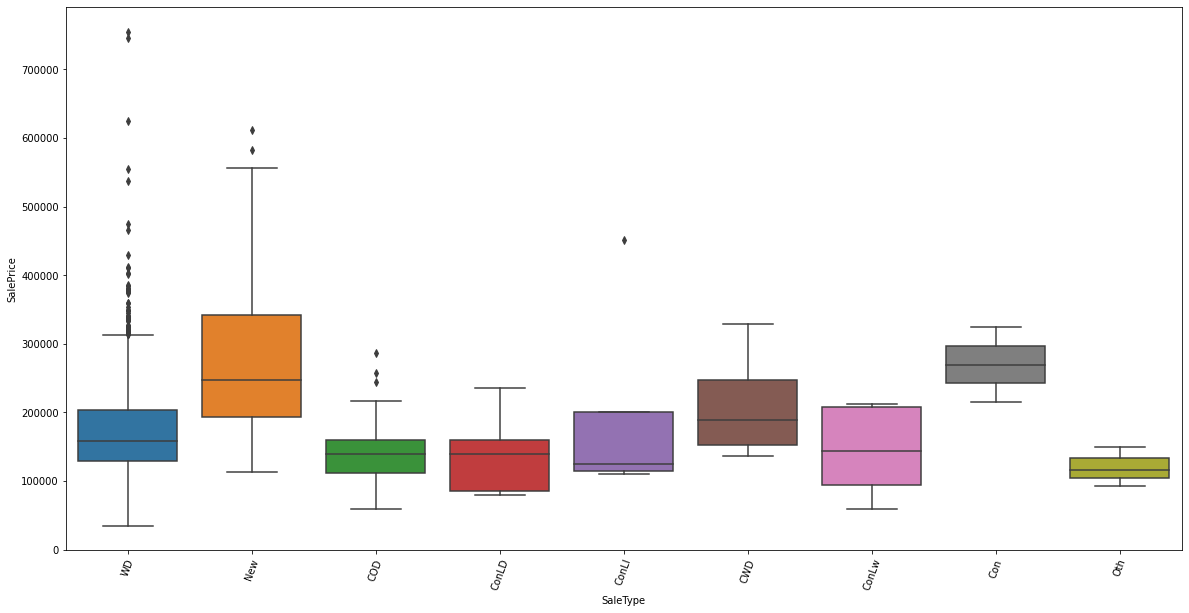

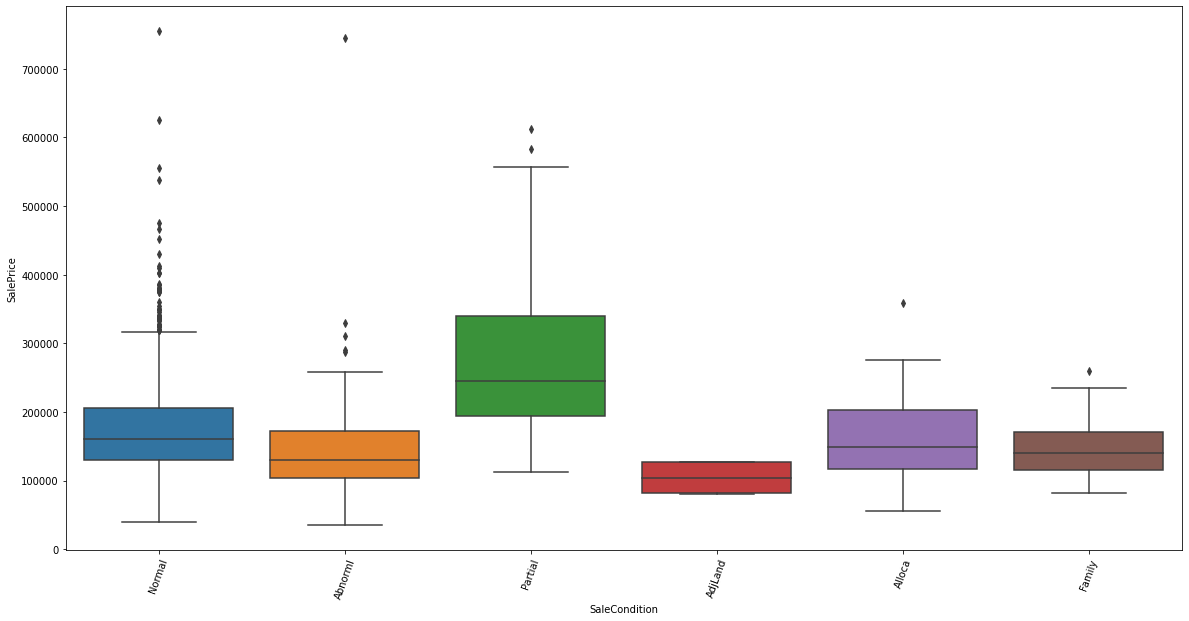

In [ ]:
categorical_cols = df.select_dtypes(include=['object'])
for column in categorical_cols.columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(x=column, y="SalePrice", data=df)
    plt.xticks(rotation=70)


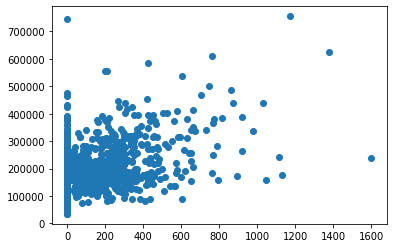

In [ ]:
plt.scatter(df['MasVnrArea'],df['SalePrice'])


Text(0.5, 1.0, 'Overall Condition')

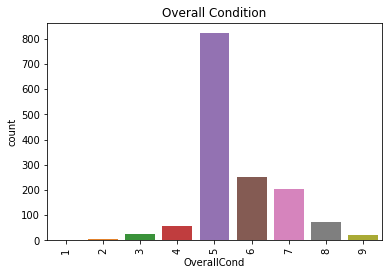

In [ ]:
sns.countplot(x='OverallCond', data=df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

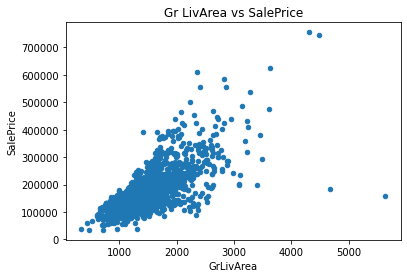

In [ ]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');
plt.title('Gr LivArea vs SalePrice')

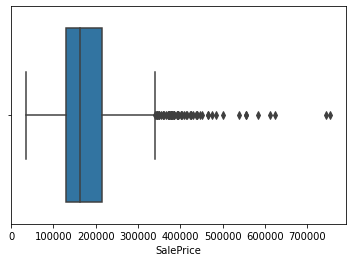

In [ ]:
sns.boxplot(x='SalePrice', data=df)


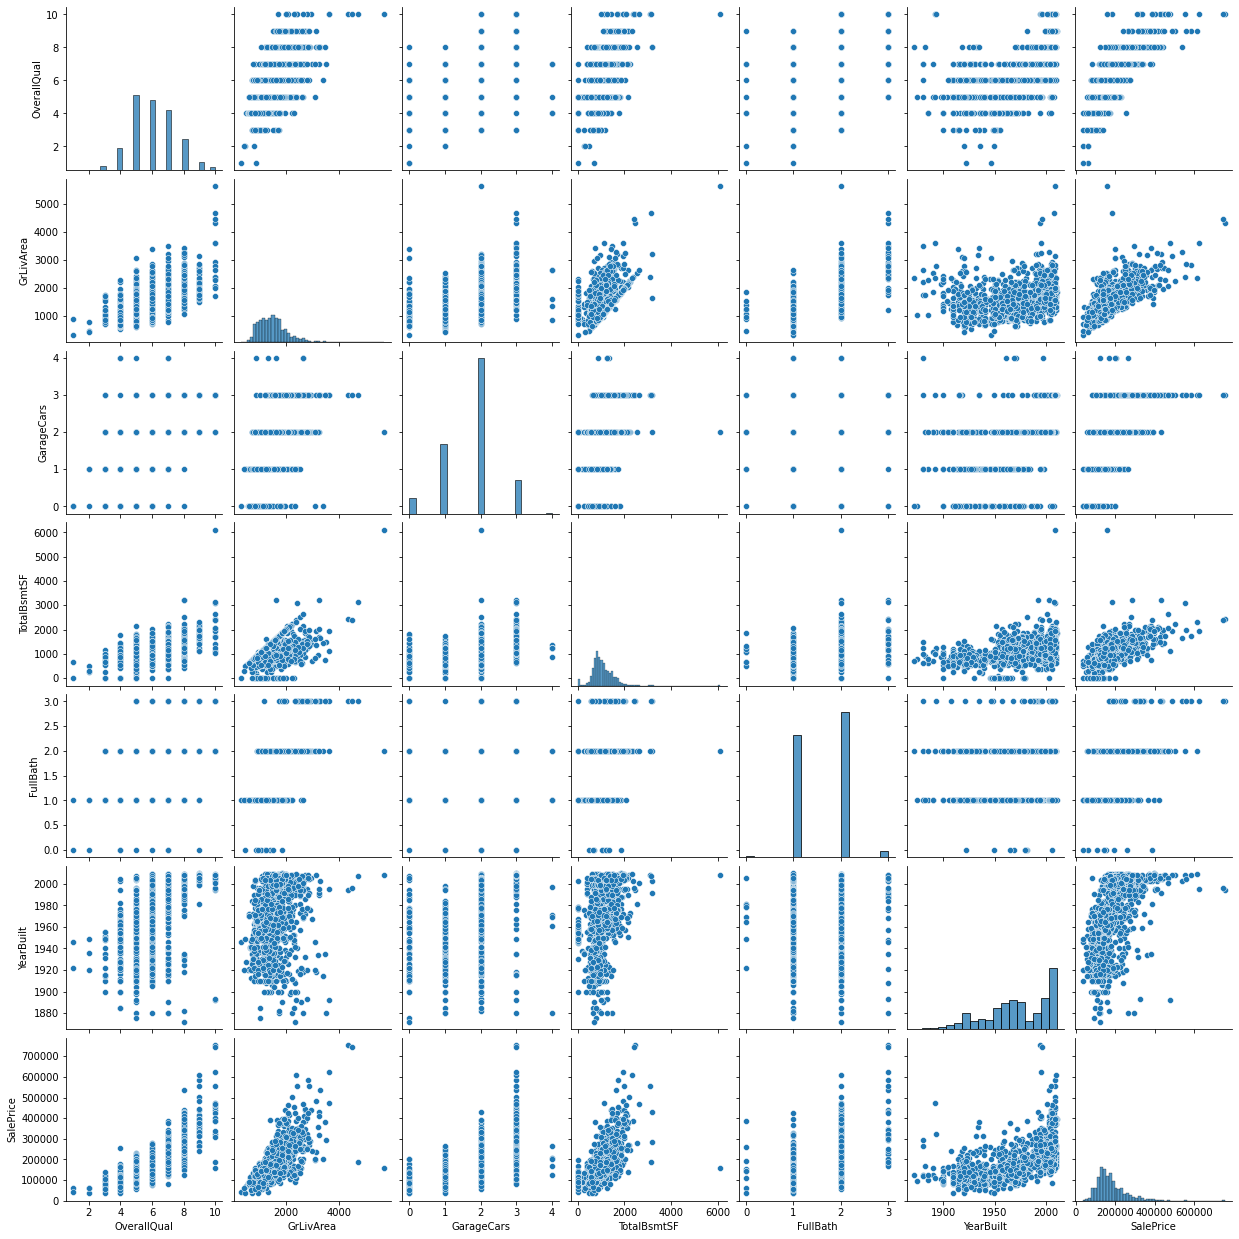

In [ ]:
cols = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','SalePrice']
sns.pairplot(df[cols])
plt.show()

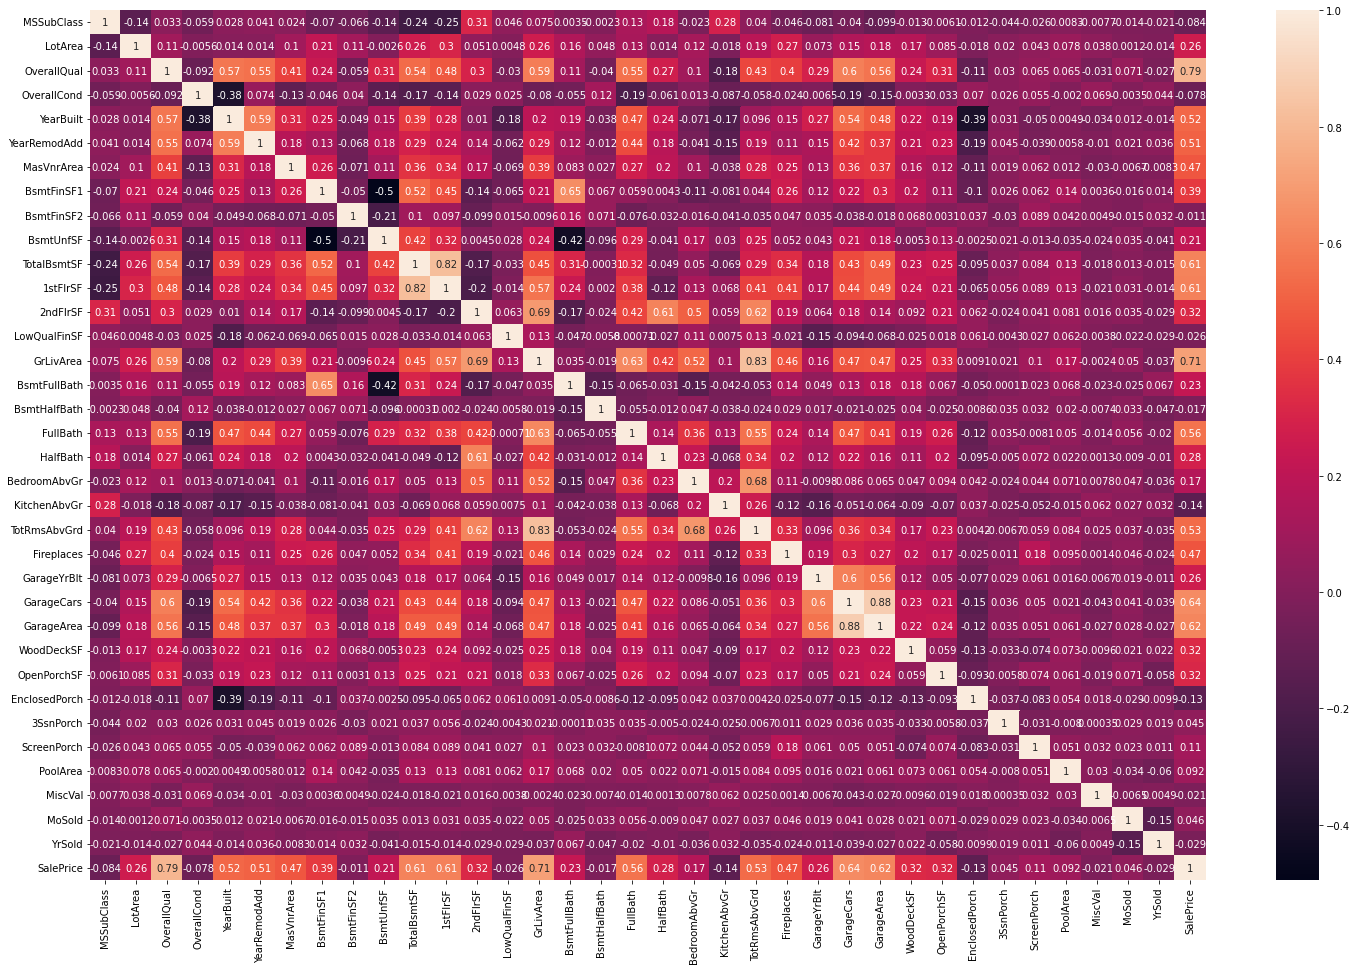

In [ ]:
cor = df.corr()
plt.figure(figsize=(25,16))
sns.heatmap(cor,annot=True)

In [ ]:
df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                                                 
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)  
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

In [ ]:
cat_values = df.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [ ]:
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.drop(list(cat_values.columns),inplace=True, axis=1)


In [ ]:
df = pd.concat([df,data_dummies], axis=1)


In [ ]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)


In [ ]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",axis=1)

In [ ]:
y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",axis=1)

In [ ]:
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Redge Regression

In [ ]:
#alpha values for tuning the model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08887409934430095


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085060,0.009368,0.026283,0.003502,0.0001,{'alpha': 0.0001},-0.091274,-0.095969,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.074657,0.023096,0.020815,0.008449,0.001,{'alpha': 0.001},-0.090981,-0.095919,-0.095062,-0.087130,...,-0.090319,0.005012,13,-0.054637,-0.055126,-0.055883,-0.056849,-0.055737,-0.055646,0.000748
2,0.037374,0.009540,0.012496,0.001895,0.01,{'alpha': 0.01},-0.090322,-0.095571,-0.094671,-0.086389,...,-0.089877,0.004964,8,-0.054828,-0.055242,-0.056021,-0.057084,-0.055877,-0.055811,0.000769
3,0.037734,0.002286,0.018896,0.009422,0.05,{'alpha': 0.05},-0.089956,-0.094644,-0.094108,-0.084318,...,-0.089202,0.004833,4,-0.055810,-0.055719,-0.056611,-0.057731,-0.056753,-0.056525,0.000731
4,0.038115,0.002865,0.014327,0.000016,0.1,{'alpha': 0.1},-0.089820,-0.094123,-0.094180,-0.082811,...,-0.088874,0.004958,1,-0.057025,-0.056196,-0.057303,-0.058636,-0.057873,-0.057407,0.000819
5,0.042068,0.007643,0.017038,0.001422,0.2,{'alpha': 0.2},-0.090348,-0.093800,-0.094783,-0.081237,...,-0.088880,0.005315,2,-0.059153,-0.056936,-0.058602,-0.060613,-0.059764,-0.059014,0.001235
6,0.039328,0.003785,0.016109,0.004387,0.3,{'alpha': 0.3},-0.090958,-0.093756,-0.095291,-0.080168,...,-0.089000,0.005682,3,-0.060833,-0.057554,-0.059782,-0.062292,-0.061428,-0.060378,0.001631
7,0.037531,0.002222,0.015446,0.001875,0.4,{'alpha': 0.4},-0.091488,-0.093843,-0.095747,-0.079508,...,-0.089264,0.005926,5,-0.062220,-0.058069,-0.060731,-0.063693,-0.062831,-0.061509,0.001973
8,0.036938,0.002388,0.016333,0.003132,0.5,{'alpha': 0.5},-0.091849,-0.093881,-0.096109,-0.079474,...,-0.089531,0.005981,6,-0.063442,-0.058536,-0.061537,-0.064837,-0.063983,-0.062467,0.002244
9,0.037346,0.002386,0.015866,0.001944,0.6,{'alpha': 0.6},-0.092042,-0.093937,-0.096402,-0.079518,...,-0.089738,0.006008,7,-0.064474,-0.058964,-0.062212,-0.065800,-0.064951,-0.063280,0.002463


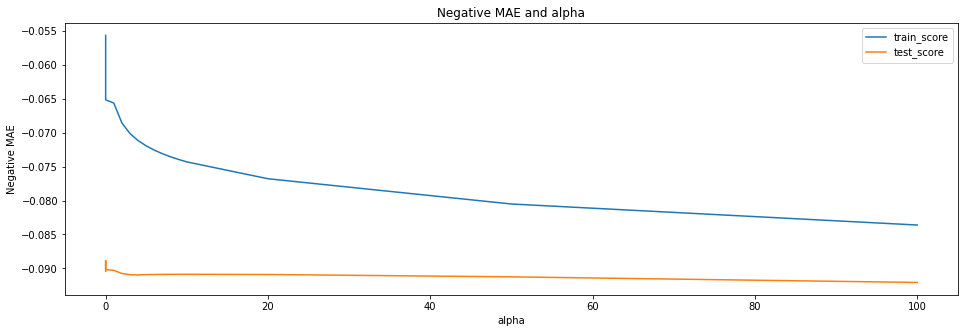

In [ ]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MAE')
plt.title("Negative MAE and alpha")
plt.legend(['train_score', 'test_score'], loc='upper_right')
plt.show()


In [ ]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588570e-02,  1.89916661e-02,  7.32789555e-03,  7.96272275e-02,
        4.07794642e-02,  3.72503132e-02,  2.05613215e-02, -2.78746650e-03,
       -1.30338934e-03,  7.00573270e-03,  4.35792500e-03,  5.54556617e-03,
        1.48198007e-02,  3.71802844e-02,  4.20641346e-02,  8.38742474e-04,
        6.23081651e-02,  2.96129113e-02,  2.70982155e-03,  1.87339500e-02,
        1.07449570e-02,  1.20912671e-02, -1.36072850e-02,  1.55763992e-02,
        2.26754481e-03, -5.94799196e-05,  4.02868362e-02,  4.26535353e-03,
        1.44146209e-03,  1.36106893e-02, -2.04566096e-03,  8.78577136e-03,
        7.21093263e-03,  1.06190103e-02, -1.48410955e-02, -1.45446773e-06,
       -1.10808590e-03, -6.42496774e-03,  4.82665080e-02,  3.90987203e-02,
        6.20215605e-02,  1.56874391e-02,  2.13169821e-03,  2.59754430e-02,
        2.43132363e-02, -5.00429742e-02,  4.82147056e-03,  3.82128670e-02,
        3.57786613e-02,  4.68948900e-02, -1.30779655e-02,  3.69458991e-02,
       -3.54872267e-02, -

In [ ]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220052627340902


In [ ]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855289803702381


In [ ]:
mean_squared_error(y_test, y_test_pred)


0.018835074908961153

In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

Lasso Regression

In [ ]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        return_train_score=True,
                        cv = folds, 
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)


In [ ]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08331689574723347


In [ ]:
ridge_double_coef = ridge.coef_
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(10)

The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
Neighborhood_Crawfor,0.103582
Neighborhood_NridgHt,0.081038
OverallQual,0.079627
Neighborhood_Somerst,0.068628
GrLivArea,0.062308
MSZoning_RL,0.062022
Neighborhood_StoneBr,0.059838
Condition1_Norm,0.058896
Exterior1st_BrkFace,0.057761
SaleType_ConLD,0.056330


In [ ]:
#final lasso model
alpha = 0.001
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [ ]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))


0.9174603870114236


In [ ]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.855155175069992


In [ ]:
mean_squared_error(y_test, y_test_pred)


0.02383278437246275

In [ ]:
lasso.coef_


array([-1.59168660e-02,  1.77242515e-02,  7.44417847e-03,  8.92749012e-02,
        4.49157058e-02,  5.23478512e-02,  2.12557290e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73459395e-02,
        1.31313542e-02,  6.83279688e-04,  0.00000000e+00, -2.76090229e-03,
        1.17924486e-01,  3.11590599e-02,  2.04071491e-03,  1.34016928e-02,
        8.46182617e-03,  5.71184430e-03, -1.14936774e-02,  1.31288789e-02,
        6.75035320e-03, -0.00000000e+00,  3.85988417e-02,  5.82205706e-03,
        1.77927095e-03,  1.28633145e-02, -0.00000000e+00,  5.99863586e-03,
        5.33667706e-03,  1.05740180e-02, -1.35240020e-02, -9.49510163e-04,
       -1.35177379e-03, -5.95070195e-03,  0.00000000e+00,  0.00000000e+00,
        4.67117524e-02, -7.00746204e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.40381931e-03, -0.00000000e+00,  2.90059351e-02,
       -0.00000000e+00, -

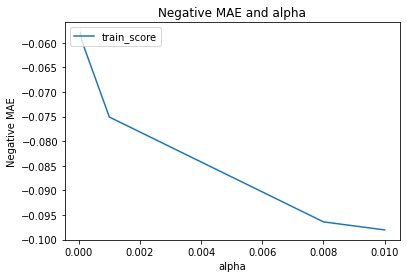

In [ ]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MAE')

plt.title("Negative MAE and alpha")
plt.legend(['train_score', 'test_score'], loc='upper left')
plt.show()


In [ ]:
model_cv.best_params_


{'alpha': 0.1}

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9575101062262641
0.7491749725359186


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']


In [ ]:
ridge_coef.sort_values(by='Coef',ascending=False).head(20)


,Feaure,Coef
0,MSSubClass,10.803599
114,RoofMatl_Membran,0.434660
39,MSZoning_FV,0.401700
41,MSZoning_RL,0.401658
40,MSZoning_RH,0.396997
42,MSZoning_RM,0.354862
116,RoofMatl_Roll,0.307582
115,RoofMatl_Metal,0.303702
119,RoofMatl_WdShngl,0.294295
237,PoolQC_No_Pool,0.248195


In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [ ]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [ ]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.9174603870114236
0.855155175069992


In [ ]:
mean_squared_error(y_test, y_test_pred)


0.02383278437246275

In [ ]:
#final ridge model
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-1.93414758e-02,  2.75455956e-02,  5.69008670e-03,  5.81401140e-02,
        3.73297826e-02,  5.10066438e-02,  2.16407684e-02, -3.79941529e-04,
        2.17552033e-02,  7.99049706e-03,  6.57001193e-03,  3.14234328e-02,
        1.31088322e-02,  4.60301525e-02,  4.69709120e-02,  1.33673204e-03,
        7.29887425e-02,  1.64298360e-02,  9.38519132e-04,  7.91620596e-03,
        2.92793079e-03,  1.01449643e-02, -1.41905742e-02,  4.59297960e-03,
       -2.83916966e-03, -1.01724264e-02,  2.25305375e-02,  1.54870357e-02,
        2.49512017e-03,  1.06601796e-02,  3.29944376e-03,  7.56028120e-03,
        5.42133828e-03,  8.54664738e-03,  6.47993262e-03,  2.38253475e-03,
        6.02486010e-04, -3.34162669e-03,  3.63097327e-01,  3.61354901e-01,
        3.68593703e-01,  3.26677384e-01,  1.87875694e-02,  3.57278536e-02,
        1.54920056e-02, -3.27063199e-02,  7.37858810e-03,  2.91565209e-02,
        2.88335611e-02,  4.18651338e-02, -9.88618382e-02,  3.15656693e-02,
       -4.79591425e-02, -

In [ ]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7864021305372033


In [ ]:
ridge_double_coef = ridge.coef_
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Alpha Co-Efficient after Doubling'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Alpha Co-Efficient after Doubling'], ascending=False,inplace=True)
ridge_double_coeff.head(5)

,Ridge Alpha Co-Efficient after Doubling
MSZoning_RL,0.368594
MSZoning_FV,0.363097
MSZoning_RH,0.361355
MSZoning_RM,0.326677
RoofMatl_Membran,0.319116


In [ ]:
#final lasso model
alpha = 0.002
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [ ]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8776245781631846


In [ ]:
lasso3_coef = lasso.coef_
y_test_pred = lasso.predict(X_test)
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient after Doubling'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient after Doubling'], ascending=False,inplace=True)
lasso3_coeff.head(5)

,Lasso Co-Efficient after Doubling
OverallQual,0.102841
GrLivArea,0.101970
Neighborhood_Crawfor,0.068315
Neighborhood_NridgHt,0.057673
Neighborhood_Somerst,0.055731
